In [ ]:
#%pip install -U scikit-learn, scorecardpy, pROC, numpy, pandas, matplotlib, statsmodels, seaborn

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'scikit-learn,'

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: c:\Users\Danilo\.pyenv\pyenv-win\versions\3.10.11\python.exe -m pip install --upgrade pip


In [ ]:
#%pip install statsmodels


     ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.6 MB 991.0 kB/s eta 0:00:10
      --------------------------------------- 0.1/9.6 MB 1.4 MB/s eta 0:00:07
     - -------------------------------------- 0.3/9.6 MB 2.3 MB/s eta 0:00:05
     -- ------------------------------------- 0.5/9.6 MB 3.2 MB/s eta 0:00:03
     ---- ----------------------------------- 1.1/9.6 MB 5.5 MB/s eta 0:00:02
     ------- -------------------------------- 1.9/9.6 MB 7.0 MB/s eta 0:00:02
     ------------ --------------------------- 3.0/9.6 MB 10.2 MB/s eta 0:00:01
     ----------------- ---------------------- 4.1/9.6 MB 11.5 MB/s eta 0:00:01
     --------------------- ------------------ 5.3/9.6 MB 13.5 MB/s eta 0:00:01
     -------------------------- ------------- 6.3/9.6 MB 13.9 MB/s eta 0:00:01
     -------------------------- ------------- 6.3/9.6 MB 13.9 MB/s eta 0:00:01
     -------------------------- ------------- 6.3/9.6 MB 13.9 MB


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: c:\Users\Danilo\.pyenv\pyenv-win\versions\3.10.11\python.exe -m pip install --upgrade pip


In [ ]:
#%pip install scorecardpy

     ---------------------------------------- 0.0/58.1 kB ? eta -:--:--
     ---------------------------------------- 58.1/58.1 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for scorecardpy: started
  Running setup.py install for scorecardpy: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: scorecardpy is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: c:\Users\Danilo\.pyenv\pyenv-win\versions\3.10.11\python.exe -m pip install --upgrade pip


In [ ]:
#%pip install pROC

     ---------------------------------------- 0.0/42.5 kB ? eta -:--:--
     ------------------------------------ - 41.0/42.5 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 42.5/42.5 kB 519.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/86.8 kB ? eta -:--:--
     ---------------------------------------- 86.8/86.8 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/85.8 kB ? eta -:--:--
     ---------------------------------------- 85.8/85.8 kB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/46.0 kB ? eta -:--:--
     ---------------------------------------- 46.0/46.0 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/83.2 kB ? eta -:--:--
     ---------------------------------------- 83.2/83.2 kB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: c:\Users\Danilo\.pyenv\pyenv-win\versions\3.10.11\python.exe -m pip install --upgrade pip


In [9]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Librerías para Scorecardpy
import scorecardpy as sc
import proc
# !pip install scorecardpy
# !pip install pROC

# Librerías de modelado de árboles
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [11]:
import pandas as pd

# Leer el archivo CSV cargado
dt_base = pd.read_csv('C:\\Users\\Danilo\\Documents\\Proyectos Full\\IA\\AI-Portfolio-DaniloRivera\\Proyecto03_Riesgo_Crediticio\\data\\BBDD_CS.csv')

In [12]:
# Ver las primeras filas del DataFrame
dt_base.head()

# Variables
  # Edad: 31.5 => 31 o 32
  # D1_MaxD12m: Deuda del último mes respecto a la máximo de los últimos 12 meses.
  # DiasAtrasos_12m: Número de meses con días de atraso en los últimos 12 meses.
  # AntiguedadSF_u24m: Número de meses en el sistema financiero en los u24m
  # flg_garantias: Si el cliente tiene garantías (1) o no (0)
  # flg_situacionlaboral: Si el cliente es dependiente(1) o  independiente(0)
  # flg_clean: Si el cliente a lo más ha estado en CPP en los u12m (1)
  # target: si el cliente ha presentado más de 90 días de vencido en
  #         en alguno de los siguientes 12 mes

,Edad,D1_MaxD12m,DiasAtrasos_12m,AntiguedadSF_u24m,flg_Garantias,flg_SituacionLaboral,Default,flg_Clean
0,34.0,0.000136,1,17,0,0.0,1,1
1,40.0,0.014983,2,24,0,1.0,0,1
2,48.0,0.117866,3,24,1,1.0,0,1
3,36.0,0.998636,1,15,0,1.0,0,1
4,45.0,0.312798,1,23,0,1.0,0,1


Conteo de valores para Default:
Default
0    136265
1     13735
Name: count, dtype: int64

Tasa de malos:
Default
0    0.908433
1    0.091567
Name: count, dtype: float64


C:\Users\Danilo\AppData\Local\Temp\ipykernel_11612\734925148.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, palette=palette)


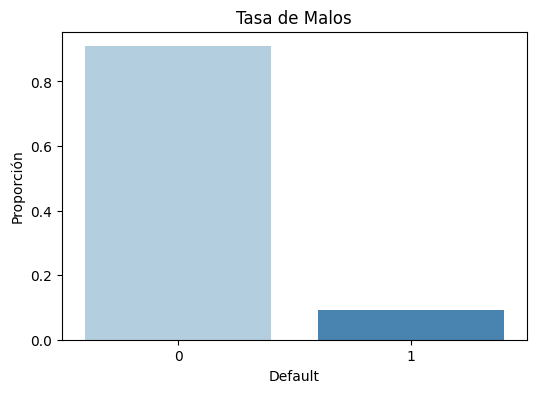

In [13]:
# ============================================
# Analizar el default (tasa de malos - bad rate)
# ============================================
default_counts = dt_base['Default'].value_counts()
default_rate = default_counts / len(dt_base)
print("Conteo de valores para Default:")
print(default_counts)
print("\nTasa de malos:")
print(default_rate)

def plot_bar(data, x, y, title, xlabel, ylabel, palette="Blues", figsize=(6, 4)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y=y, data=data, palette=palette)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Visualización de la tasa de malos
plot_bar(data=None, x=default_counts.index, y=default_rate.values,
          title="Tasa de Malos", xlabel="Default", ylabel="Proporción")

In [14]:
# ============================
# Análisis de Segmentación
# ============================
  # Edad:
    # El punto de corte: 27
dt_base['edad_seg_cat'] = dt_base['Edad'].apply(lambda x: 1 if x > 27 else 2)

In [15]:
# Calcular la tasa de malos (bad rate) por segmento de edad
result = dt_base.groupby('edad_seg_cat').agg(
    BR=('Default', 'mean'),
    N=('Default', 'size')
).reset_index()

print(result)

   edad_seg_cat        BR       N
0             1  0.088640  145792
1             2  0.192966    4208


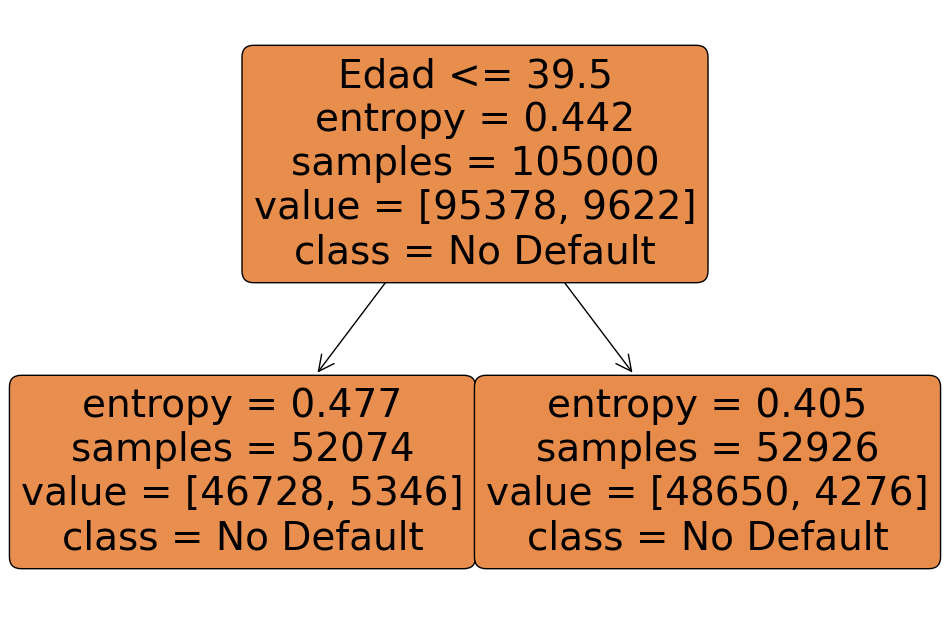

In [16]:
 # ¿El 27 es el punto óptimo?
# Dividir los datos en variables independientes (X) y la variable dependiente (y)
X = dt_base[['Edad']]
y = dt_base['Default']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el árbol de decisión
clf = DecisionTreeClassifier(min_samples_leaf=int(0.3 * len(dt_base)), criterion='entropy', max_depth=None)
clf.fit(X_train, y_train)

# Graficar el árbol de decisión
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=['Edad'], class_names=['No Default', 'Default'], rounded=True)
plt.show()

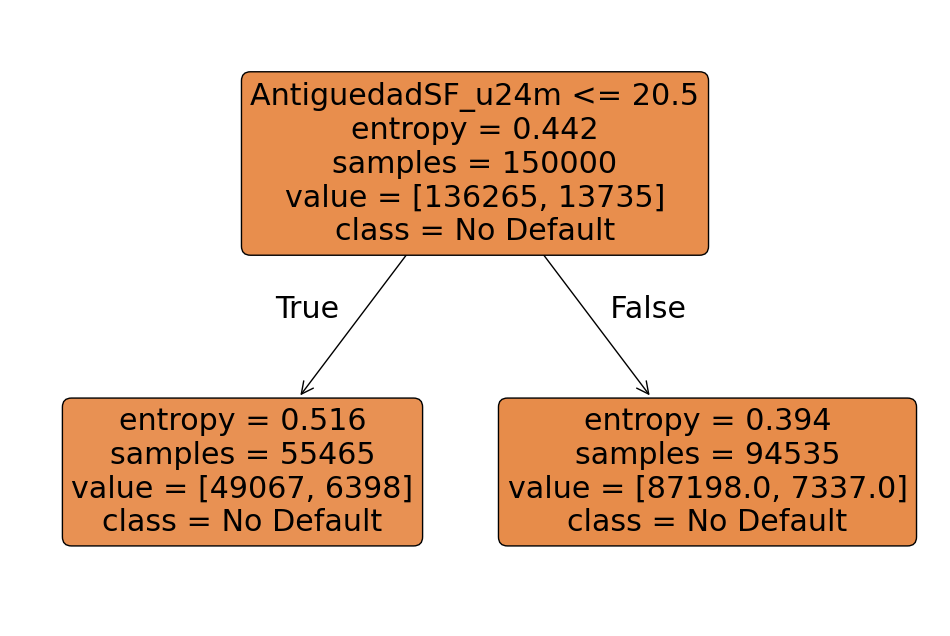

In [9]:
# Segmentación de Antigüedad
dt_base['AntiguedadSF_u24m_seg_cat'] = np.where(dt_base['AntiguedadSF_u24m'] > 12, 1, 2)

# Calcular la tasa de malos (bad rate)
bad_rate = dt_base.groupby('AntiguedadSF_u24m_seg_cat').agg(
    BR=('Default', 'mean'),
    N=('Default', 'size')
).reset_index()

# ¿El 12 es el punto óptimo? (Construcción de árbol de decisión)
X = dt_base[['AntiguedadSF_u24m']]
y = dt_base['Default']

# Crear el árbol de decisión
clf = DecisionTreeClassifier(min_samples_leaf=int(0.3 * len(dt_base)), criterion='entropy', max_depth=None)
clf.fit(X, y)

# Graficar el árbol de decisión
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=['AntiguedadSF_u24m'], class_names=['No Default', 'Default'], rounded=True)
plt.show()

In [10]:
# Calcular la tasa de malos (bad rate) por 'flg_Clean'
bad_rate_clean = dt_base.groupby('flg_Clean').agg(
    BR=('Default', 'mean'),
    N=('Default', 'size')
).reset_index()


print(bad_rate_clean)

   flg_Clean       BR       N
0          0  0.19080   50000
1          1  0.04195  100000


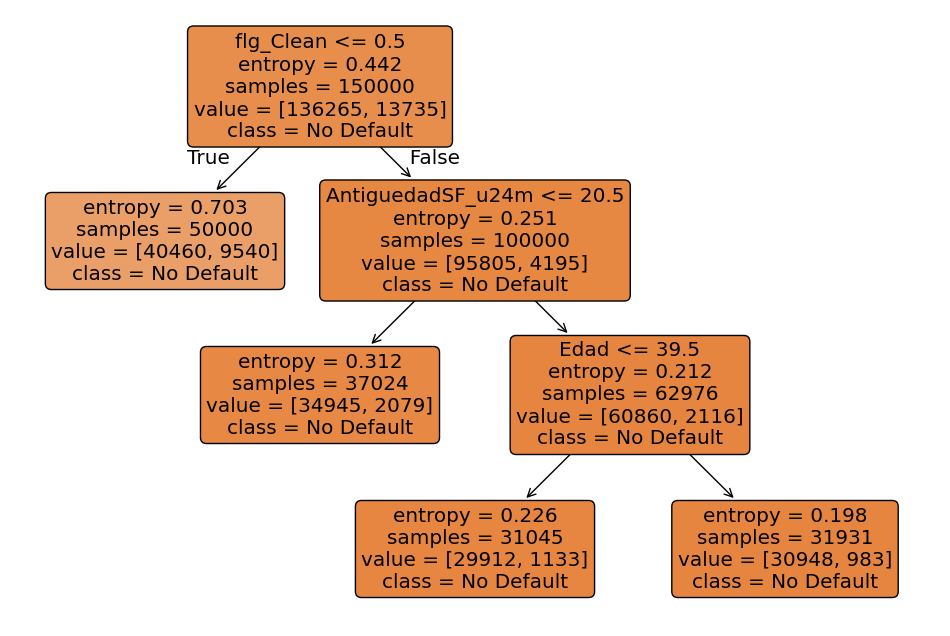

In [11]:
 # Evaluar segmentación de más de una variable con árboles de decisión
# Crear un árbol de decisión evaluando más de una variable
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Definir las variables independientes (X) y la dependiente (y)
X = dt_base[['Edad', 'AntiguedadSF_u24m', 'flg_Clean']]
y = dt_base['Default']

# Crear el árbol de decisión con los parámetros especificados
clf = DecisionTreeClassifier(min_samples_leaf=int(0.2 * len(dt_base)), criterion='entropy', max_depth=None)
clf.fit(X, y)

# Graficar el árbol de decisión
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=['Edad', 'AntiguedadSF_u24m', 'flg_Clean'], class_names=['No Default', 'Default'], rounded=True)
plt.show()

In [12]:
# Segmentar la población en función a los resultados
dt_base_seg1 = dt_base[dt_base['flg_Clean'] == 1]
dt_base_seg2 = dt_base[dt_base['flg_Clean'] == 0]

  # Nota: Se trabajará sólo con la base segmentación 1

In [13]:
# Calcular la tasa de malos (bad rate) para cada segmento
BR_seg1 = dt_base_seg1['Default'].mean()
BR_seg2 = dt_base_seg2['Default'].mean()

print(f"Tasa de malos para el segmento 1: {BR_seg1}")
print(f"Tasa de malos para el segmento 2: {BR_seg2}")

Tasa de malos para el segmento 1: 0.04195
Tasa de malos para el segmento 2: 0.1908


   flg_Garantias  Total  Total_pct
0              0  79943    0.79943
1              1  20057    0.20057


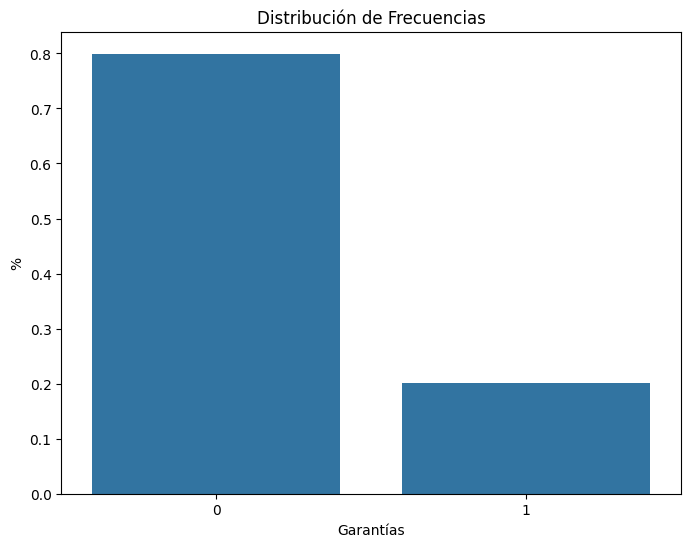

In [14]:
# ===========================
# Análisis Cualitativo
# ===========================

# Calcular la distribución de frecuencias por 'flg_Garantias'
dt_1 = dt_base_seg1.groupby('flg_Garantias').agg(
    Total=('Default', 'size'),
    Total_pct=('Default', lambda x: len(x) / len(dt_base_seg1))
).reset_index()

# Mostrar la tabla de resultados
print(dt_1)

# Graficar la distribución de frecuencias
plt.figure(figsize=(8,6))
sns.barplot(x='flg_Garantias', y='Total_pct', data=dt_1)

# Personalizar la gráfica
plt.ylabel('%')
plt.xlabel('Garantías')
plt.title('Distribución de Frecuencias')

# Mostrar la gráfica
plt.show()


   flg_Garantias  Total  Total_pct
0              0  79943    0.79943
1              1  20057    0.20057


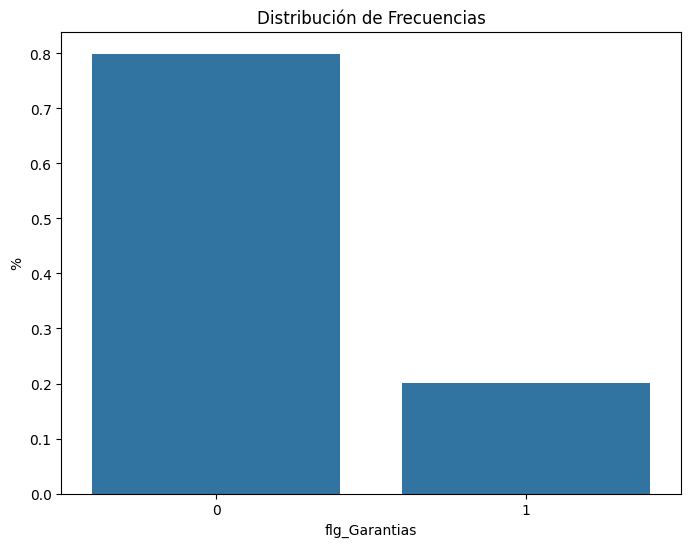

   flg_SituacionLaboral  Total  Total_pct
0                   0.0  30161    0.30161
1                   1.0  64839    0.64839


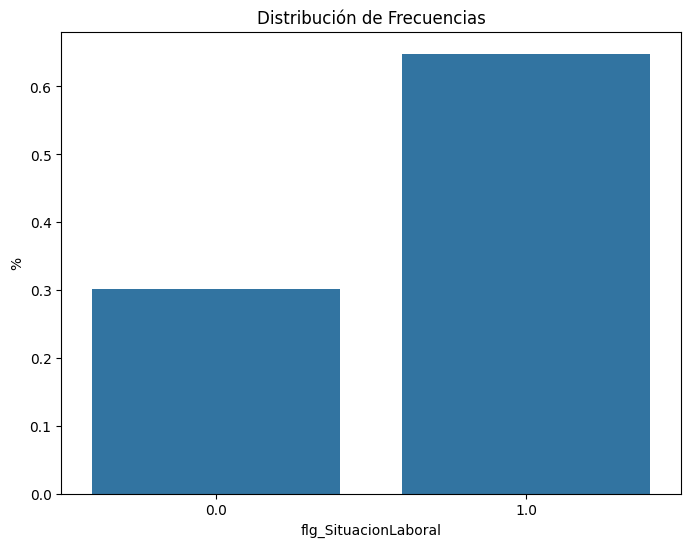

   Default  Total  Total_pct
0        0  95805    0.95805
1        1   4195    0.04195


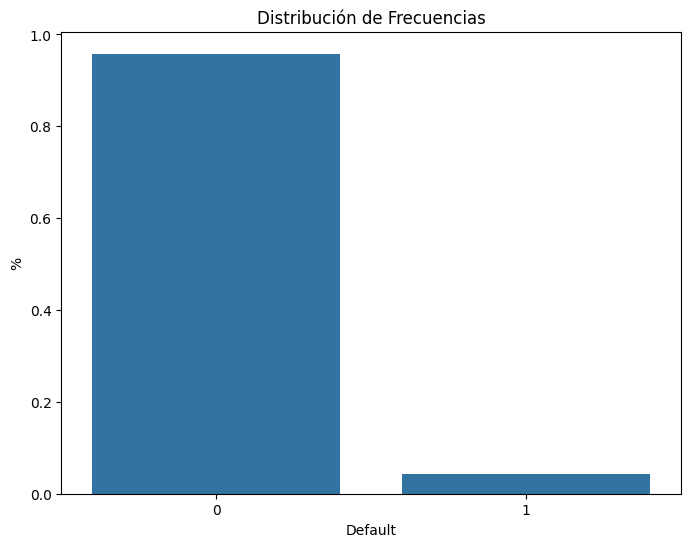

{'DatosDescriptivos':    Default  Total  Total_pct
 0        0  95805    0.95805
 1        1   4195    0.04195,
 'Grafico': <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>}

In [15]:
# Crear la función de análisis cualitativo
def f_AnalisisCualitativo(data, variable):
    # Calcular los datos descriptivos
    dt_1 = data.groupby(variable).agg(
        Total=('Default', 'size'),
        Total_pct=('Default', lambda x: len(x) / len(data))
    ).reset_index()

    # Mostrar los datos descriptivos
    print(dt_1)

    # Crear el gráfico de barras
    plt.figure(figsize=(8, 6))
    sns.barplot(x=variable, y='Total_pct', data=dt_1)

    # Personalizar el gráfico
    plt.ylabel('%')
    plt.xlabel(variable)
    plt.title('Distribución de Frecuencias')

    # Mostrar el gráfico
    plt.show()

    # Devolver los resultados
    return {'DatosDescriptivos': dt_1, 'Grafico': plt}

# Ejecutar la función para las variables especificadas
f_AnalisisCualitativo(dt_base_seg1, "flg_Garantias")
f_AnalisisCualitativo(dt_base_seg1, "flg_SituacionLaboral")
f_AnalisisCualitativo(dt_base_seg1, "Default")

count    99000.000000
mean        40.004727
std          6.342208
min         19.000000
25%         36.000000
50%         40.000000
75%         44.000000
max         99.000000
Name: Edad, dtype: float64


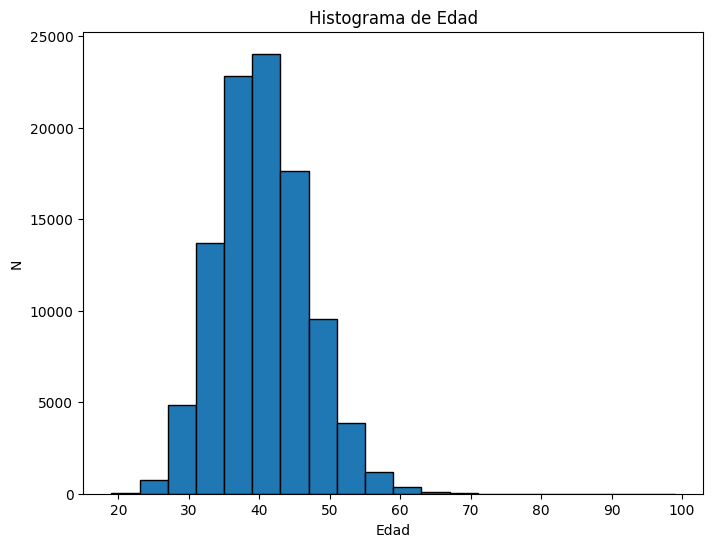

In [16]:
# ===========================
# Análisis Cuantitativo
# ===========================

# Resumen estadístico de la variable 'Edad'
summary = dt_base_seg1['Edad'].describe()

# Mostrar los estadísticos descriptivos
print(summary)

# Histograma
plt.figure(figsize=(8,6))
plt.hist(dt_base_seg1['Edad'], bins=20, edgecolor='black')

# Personalizar el gráfico
plt.xlabel('Edad')
plt.ylabel('N')
plt.title('Histograma de Edad')

# Mostrar el gráfico
plt.show()

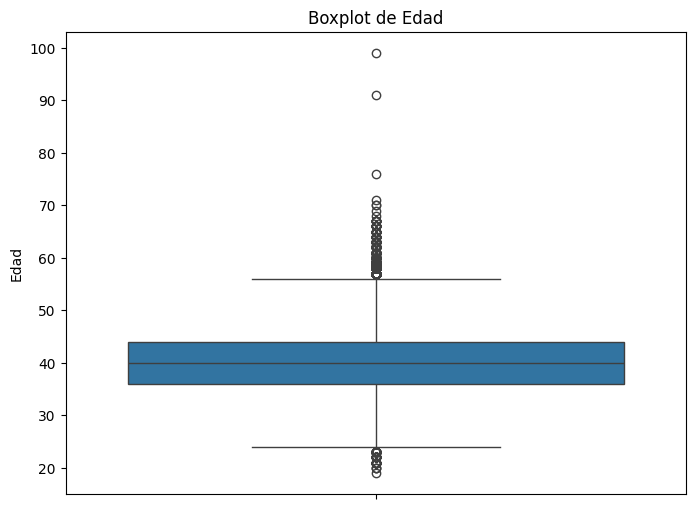

In [17]:
# Crear el boxplot
plt.figure(figsize=(8,6))
sns.boxplot(y=dt_base_seg1['Edad'])

# Añadir los errores al boxplot (similar al stat_boxplot en ggplot2)
plt.title('Boxplot de Edad')
plt.ylabel('Edad')

# Mostrar el gráfico
plt.show()

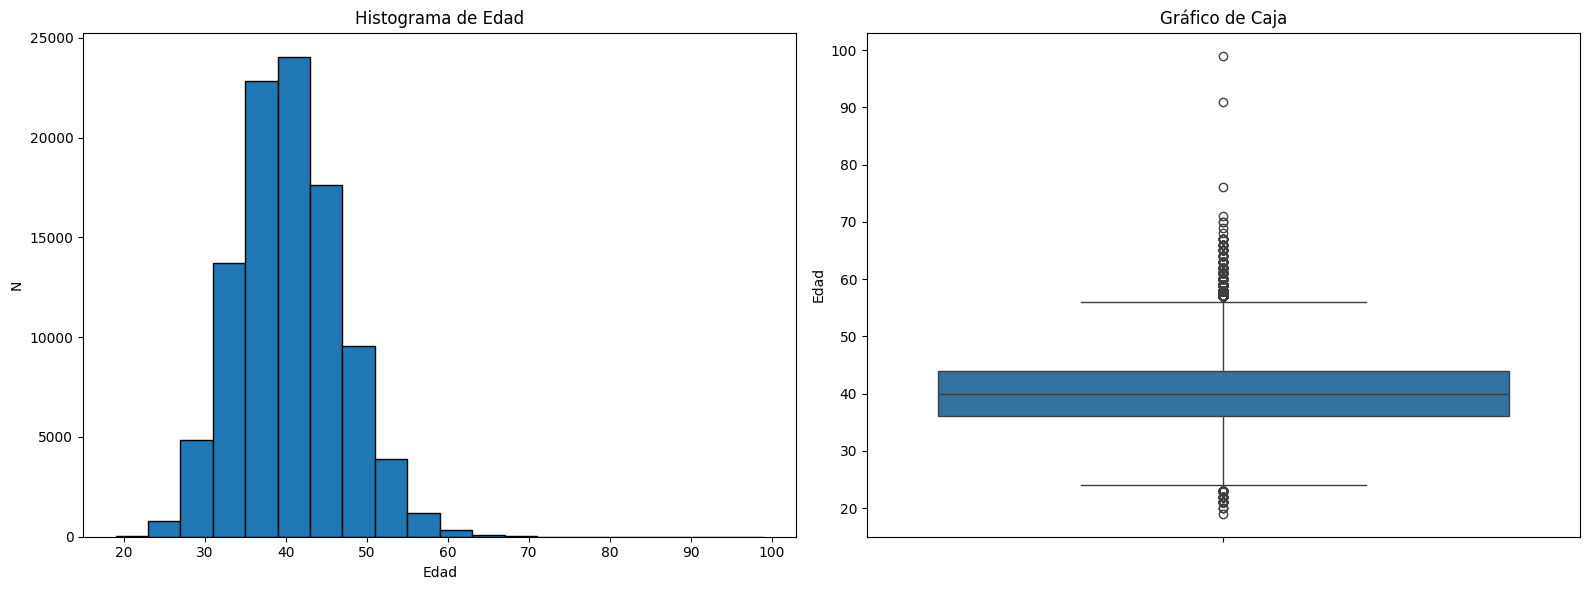

In [18]:
# Crear figura y subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma
axes[0].hist(dt_base_seg1['Edad'], bins=20, edgecolor='black')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('N')
axes[0].set_title('Histograma de Edad')

# Boxplot
sns.boxplot(y=dt_base_seg1['Edad'], ax=axes[1])
axes[1].set_title('Gráfico de Caja')
axes[1].set_ylabel('Edad')

# Mostrar la figura
plt.tight_layout()
plt.show()

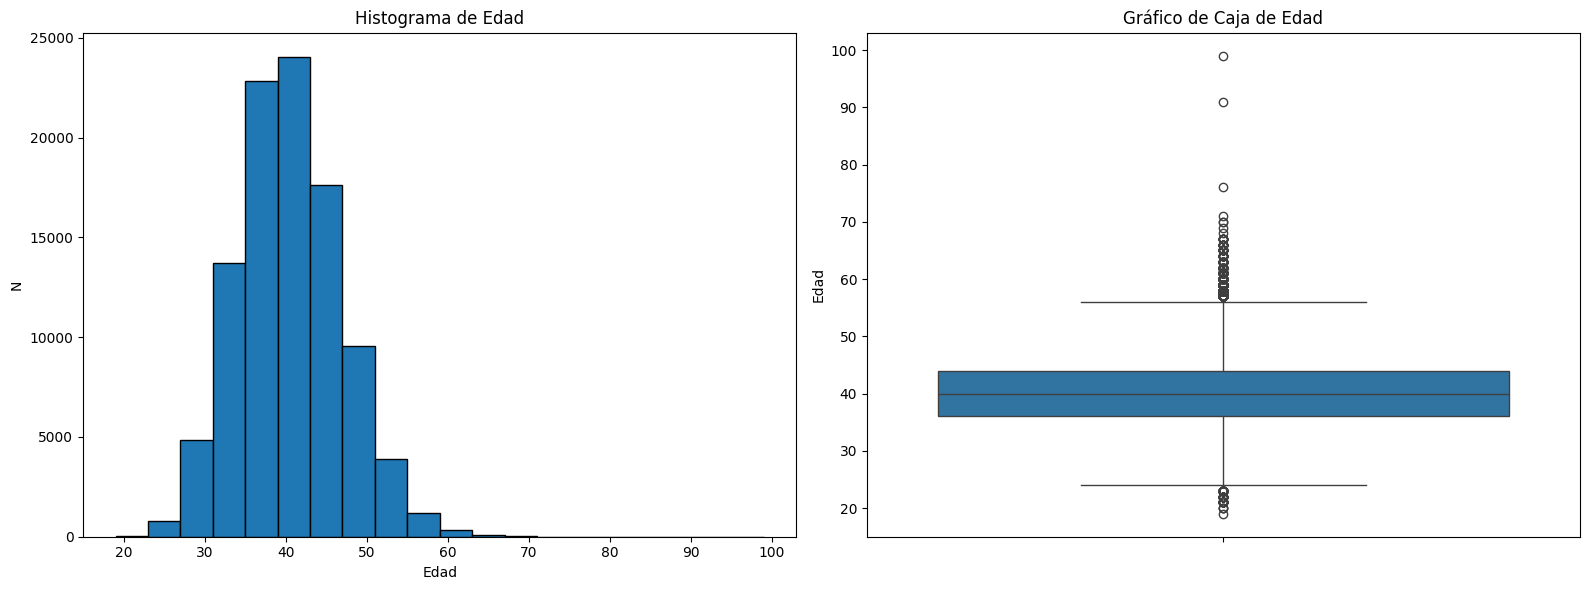

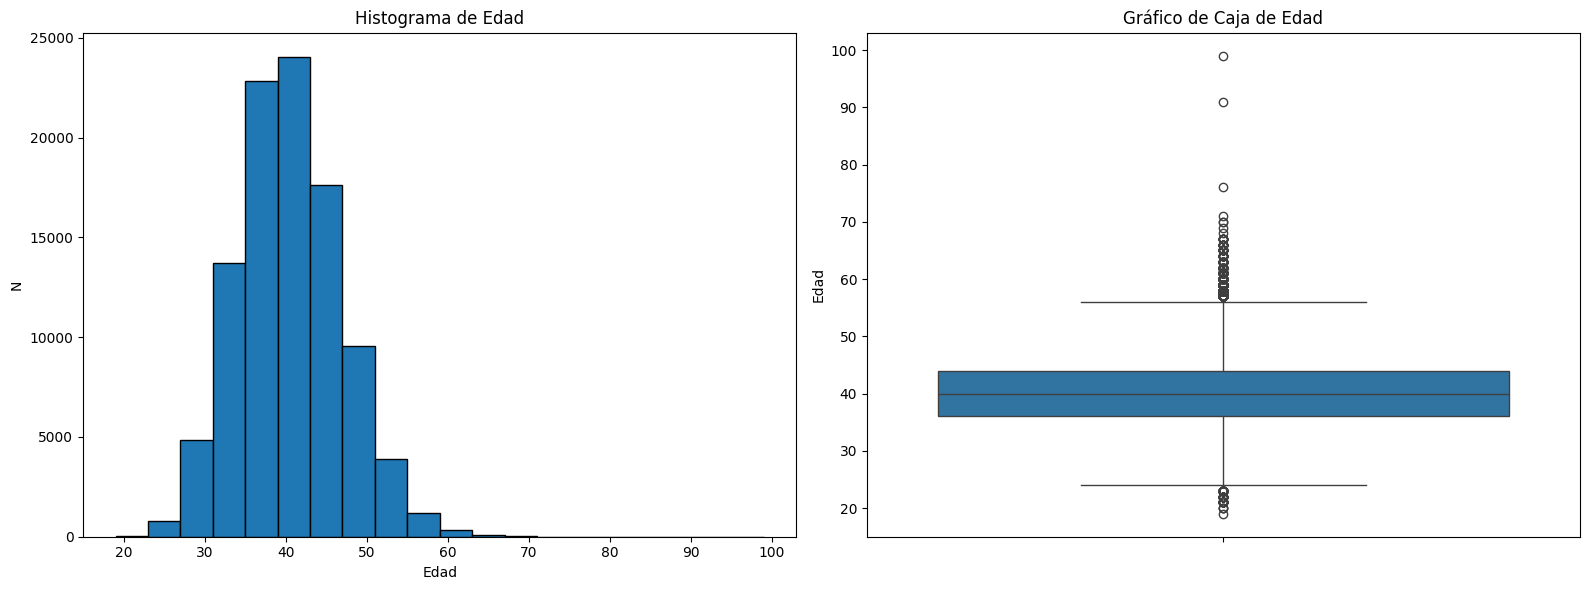

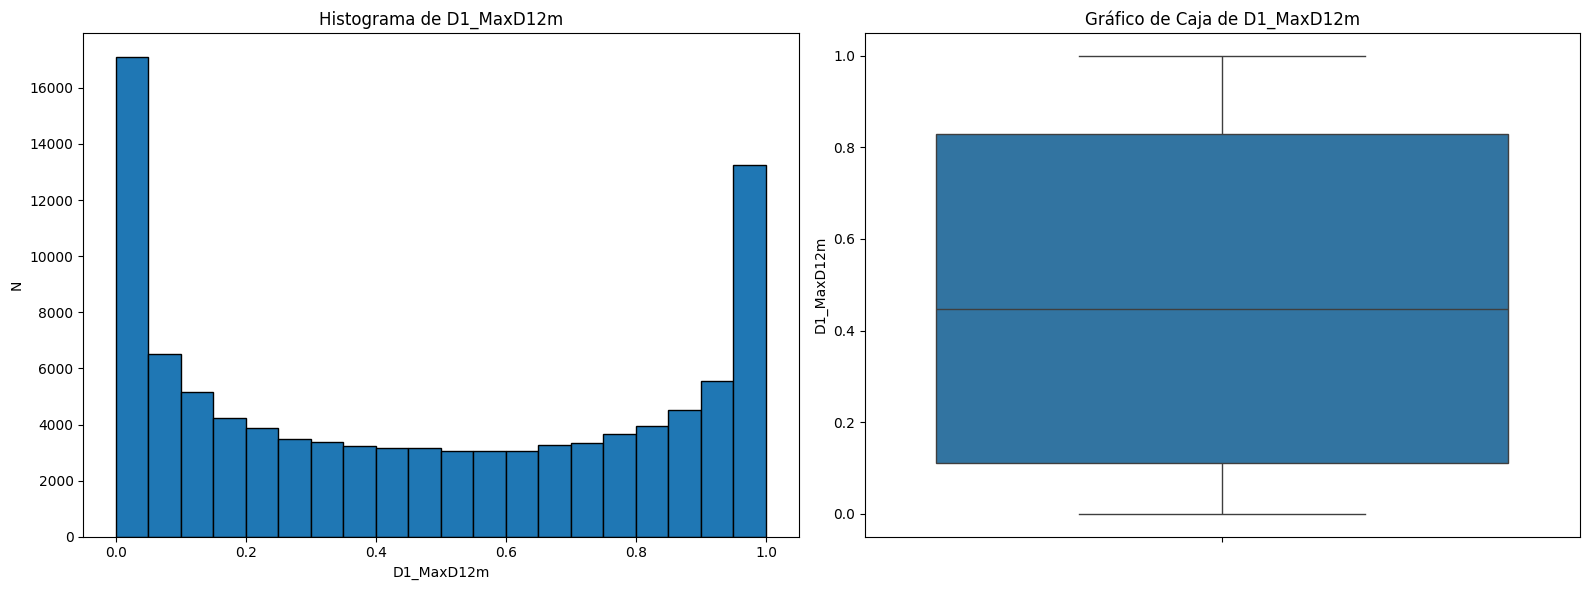

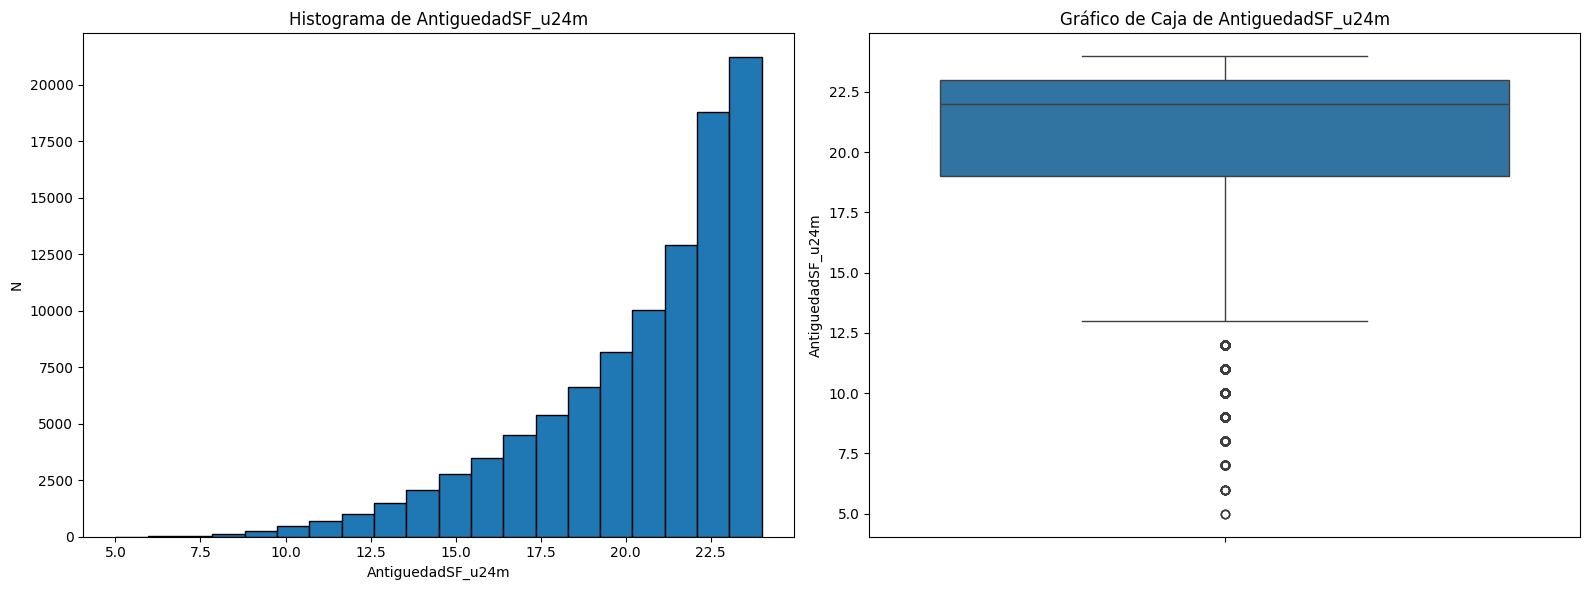

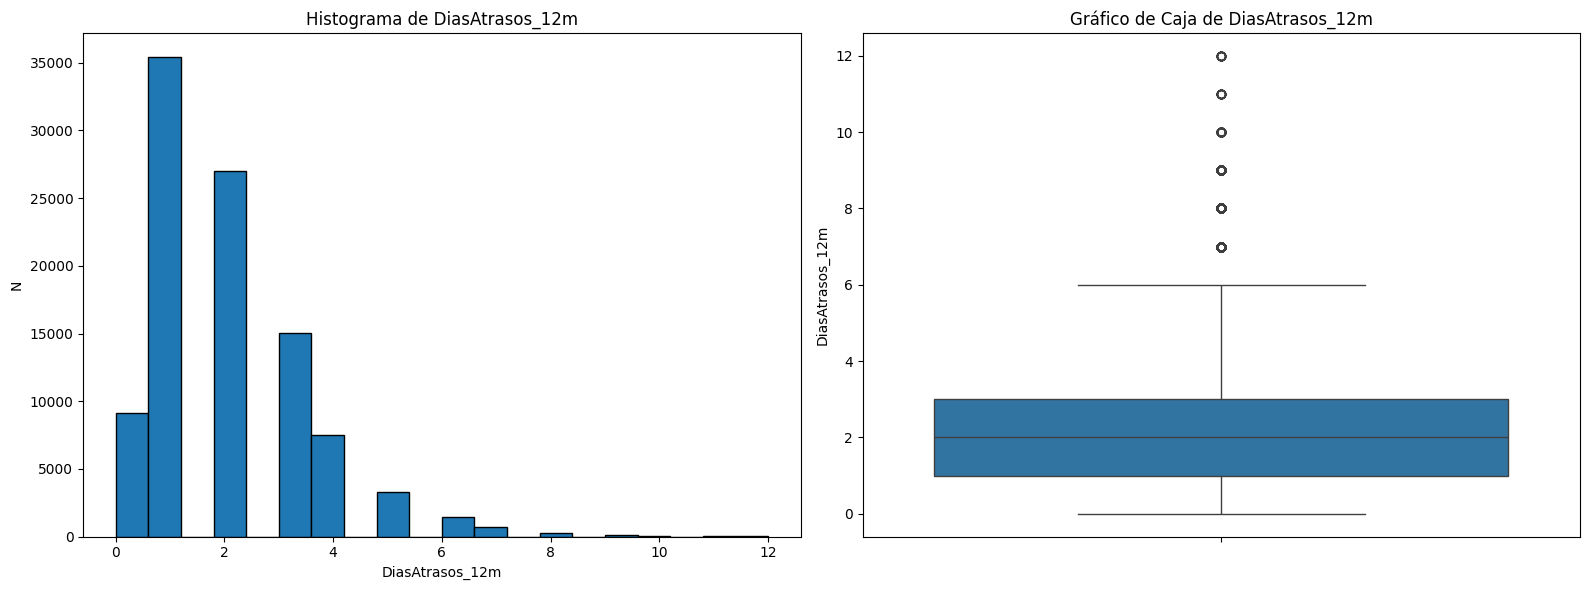

In [19]:
# Función para análisis cuantitativo
def f_AnalisisCuantitativo(data, variable):
    # Cuadro de estadísticos
    dt_estadisticos = data[variable].describe().to_frame().T

    # Crear una figura con dos subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Histograma
    axes[0].hist(data[variable], bins=20, edgecolor='black')
    axes[0].set_xlabel(variable)
    axes[0].set_ylabel('N')
    axes[0].set_title(f'Histograma de {variable}')

    # Boxplot
    sns.boxplot(y=data[variable], ax=axes[1])
    axes[1].set_title(f'Gráfico de Caja de {variable}')
    axes[1].set_ylabel(variable)

    # Ajustar el layout para evitar solapamientos
    plt.tight_layout()
    plt.show()

    return dt_estadisticos

# Aplicar la función a una variable
result_edad = f_AnalisisCuantitativo(data=dt_base_seg1, variable="Edad")

# Lista de variables cuantitativas
v_var_cuantativas = ["Edad", "D1_MaxD12m", "AntiguedadSF_u24m", "DiasAtrasos_12m"]

# Loop para aplicar la función a varias variables
for var in v_var_cuantativas:
    result = f_AnalisisCuantitativo(data=dt_base_seg1, variable=var)

In [20]:
# ========================================
# Tratamiento Missing Values o Valores Especiales
# ========================================

# Verificar si hay valores faltantes (NAs) en una variable
sum(dt_base_seg1['Edad'].isna())

# Comprobar todas las variables para NAs y valores especiales (como 999)
missing_values = dt_base_seg1.apply(lambda x: sum(x.isna() | (x == 999)))
dt_missing = missing_values.reset_index()
dt_missing.columns = ['Variable', 'nMissings']

# Omitir todos los NAs
# Reducir la población objetivo
dt_base_seg1_sinNas = dt_base_seg1.dropna()
print(f"Filas originales: {len(dt_base_seg1)}, Filas después de eliminar NAs: {len(dt_base_seg1_sinNas)}")

# Inputar los valores o incluirlos en el análisis
# Mostrar filas con valores NA en 'flg_SituacionLaboral'
dt_base_seg1[dt_base_seg1['flg_SituacionLaboral'].isna()]

# Calcular la media de 'Default' por 'flg_SituacionLaboral'
dt_base_seg1.groupby('flg_SituacionLaboral')['Default'].mean()

# Calcular la media de 'Default' por 'edad_seg_cat'
dt_base_seg1.groupby('edad_seg_cat')['Default'].mean()


Filas originales: 100000, Filas después de eliminar NAs: 95000


,Default
edad_seg_cat,
1,0.040937
2,0.082147


In [21]:
# ============================================================
# Muestra de Entrenamiento y Validación
# Pueden luego incorporar una muestra fuera de tiempo (OOT)
# ============================================================

# Establecer una semilla para garantizar la reproducibilidad
import numpy as np
np.random.seed(20230225)

# Calcular el número total de registros
nRegistros = len(dt_base_seg1)

# Realizar el muestreo 70% - 30%
v_ids = np.random.choice(nRegistros, size=int(0.70 * nRegistros), replace=False)

# Muestra de entrenamiento
dt_train = dt_base_seg1.iloc[v_ids]
dt_test = dt_base_seg1.drop(v_ids)

# Verificar el tamaño de las muestras
print(f"Tamaño de la muestra de entrenamiento: {len(dt_train)}")
print(f"Tamaño de la muestra de prueba: {len(dt_test)}")

Tamaño de la muestra de entrenamiento: 70000
Tamaño de la muestra de prueba: 30000


<ipython-input-25-4cc0ccbd3578>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_train['edad_cat_1'] = pd.cut(dt_train['Edad'], bins=v_c)
<ipython-input-25-4cc0ccbd3578>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_train['edad_cat_1e'] = pd.cut(dt_train['Edad'], bins=v_c, labels=False)
<ipython-input-25-4cc0ccbd3578>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=Tr

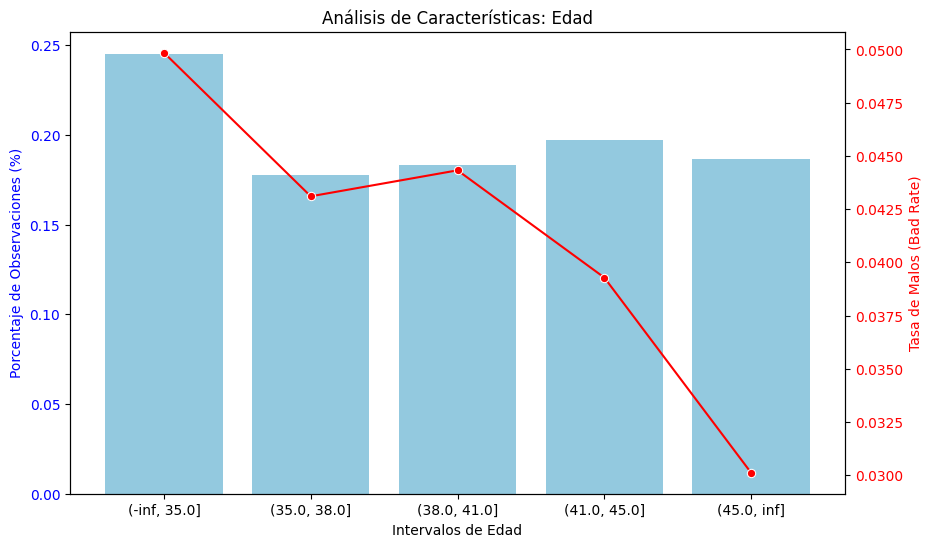

In [25]:
# ============================================================
# Análisis de características
# ============================================================
# Crear intervalos de igual frecuencia (quintiles)
v_c = [-np.inf] + list(np.quantile(dt_train['Edad'].dropna(), [0.2, 0.4, 0.6, 0.8])) + [np.inf]

# Categorizar la variable 'Edad' en intervalos
dt_train['edad_cat_1'] = pd.cut(dt_train['Edad'], bins=v_c)
dt_train['edad_cat_1e'] = pd.cut(dt_train['Edad'], bins=v_c, labels=False)

# Análisis descriptivo por categoría de edad
dt_edad_analisis = dt_train.groupby('edad_cat_1').agg(
    N=('Edad', 'size'),
    N_pct=('Edad', lambda x: len(x) / len(dt_train)),
    BR=('Default', 'mean')
).reset_index()

# Agregar la columna 'edad_cat_1e' al DataFrame dt_edad_analisis
dt_edad_analisis['edad_cat_1e'] = dt_edad_analisis.index # Since edad_cat_1e was label encoded

# Visualización del análisis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barras de porcentaje
sns.barplot(data=dt_edad_analisis, x='edad_cat_1', y='N_pct', color='skyblue', ax=ax1)
ax1.set_ylabel("Porcentaje de Observaciones (%)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Línea de tasa de malos (bad rate)
ax2 = ax1.twinx()
sns.lineplot(data=dt_edad_analisis, x='edad_cat_1e', y='BR', color='red', marker='o', ax=ax2) # Usando 'edad_cat_1e'
ax2.set_ylabel("Tasa de Malos (Bad Rate)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Títulos y ajustes
plt.title("Análisis de Características: Edad")
ax1.set_xlabel("Intervalos de Edad")
plt.show()

Árbol de decisión para la variable: Edad


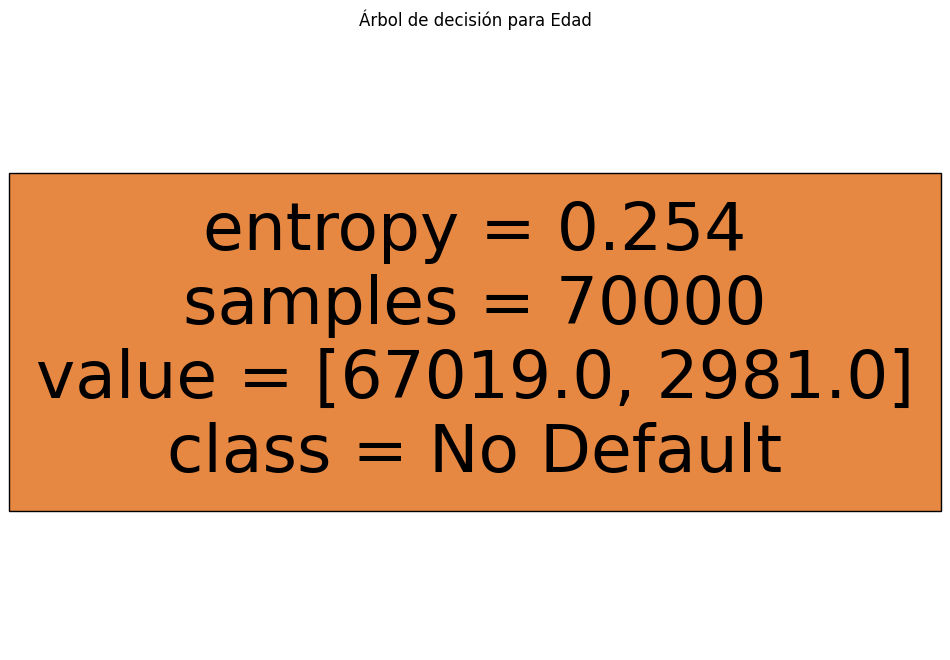

|--- class: 0

Árbol de decisión para la variable: D1_MaxD12m


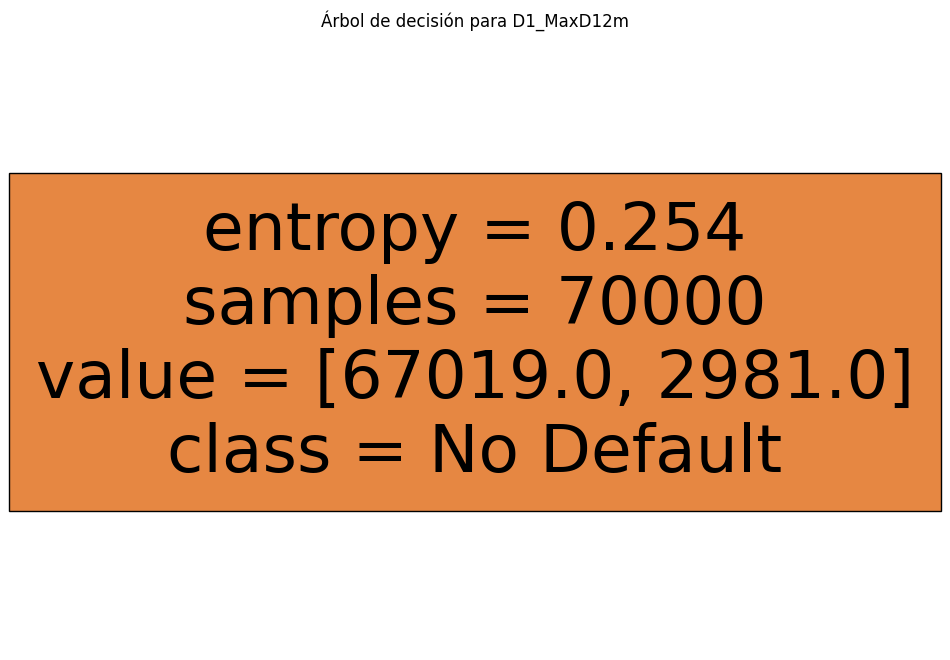

|--- class: 0

Árbol de decisión para la variable: AntiguedadSF_u24m


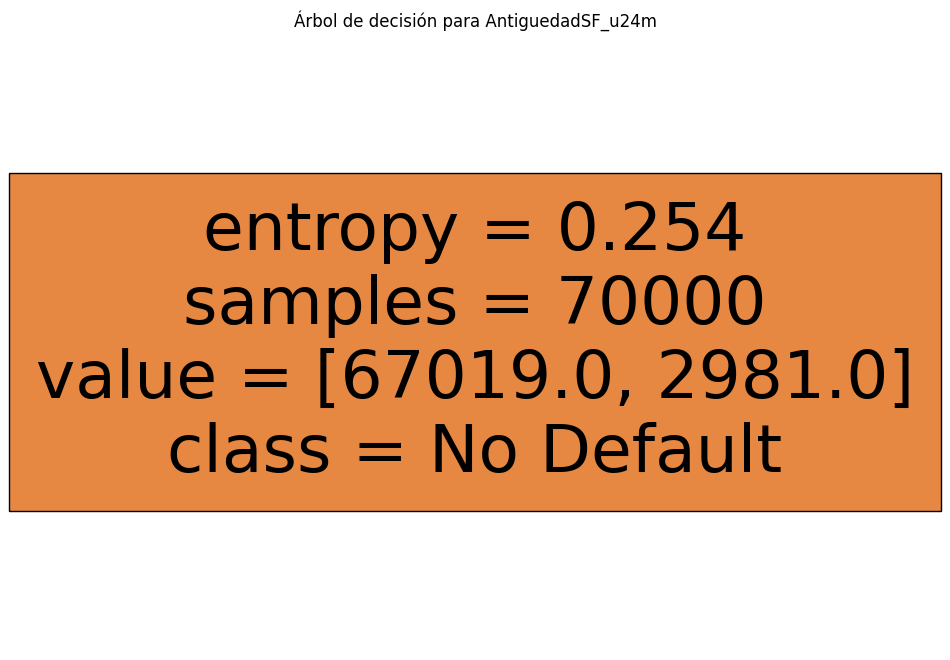

|--- class: 0

Árbol de decisión para la variable: DiasAtrasos_12m


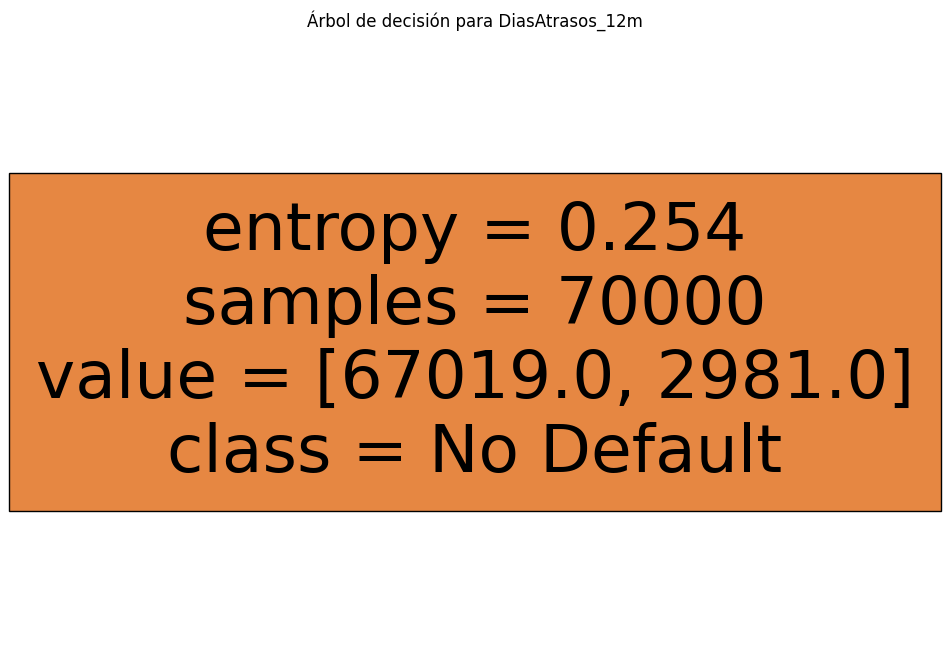

|--- class: 0



In [27]:
# ============================================================
# Arbol de decisión
# ============================================================
# Importar la función export_text
from sklearn.tree import export_text # Import the necessary function

# Crear conjuntos de entrenamiento y prueba
X = dt_train[['Edad', 'D1_MaxD12m', 'AntiguedadSF_u24m', 'DiasAtrasos_12m']]
y = dt_train['Default']

# Parámetros del árbol
min_samples_split = int(0.05 * len(X))  # Equivalente a minbucket en R
min_impurity_decrease = 1 - 0.99        # Equivalente a mincriterion en R

# Función para entrenar y visualizar árboles de decisión
def decision_tree_analysis(X, y, feature):
    # Filtrar la variable en análisis
    X_feature = X[[feature]]

    # Crear y entrenar el modelo
    tree = DecisionTreeClassifier(
        criterion='entropy',  # Similar a Party
        min_samples_split=min_samples_split,
        min_impurity_decrease=min_impurity_decrease,
        random_state=42
    )
    tree.fit(X_feature, y)

    # Visualización del árbol
    plt.figure(figsize=(12, 8))
    plot_tree(tree, feature_names=[feature], class_names=["No Default", "Default"], filled=True)
    plt.title(f"Árbol de decisión para {feature}")
    plt.show()

    # Exportar árbol en texto
    tree_rules = export_text(tree, feature_names=[feature])
    print(tree_rules)

# Análisis por variable
for feature in ['Edad', 'D1_MaxD12m', 'AntiguedadSF_u24m', 'DiasAtrasos_12m']:
    print(f"Árbol de decisión para la variable: {feature}")
    decision_tree_analysis(X, y, feature)

Árbol de decisión para la variable: Edad


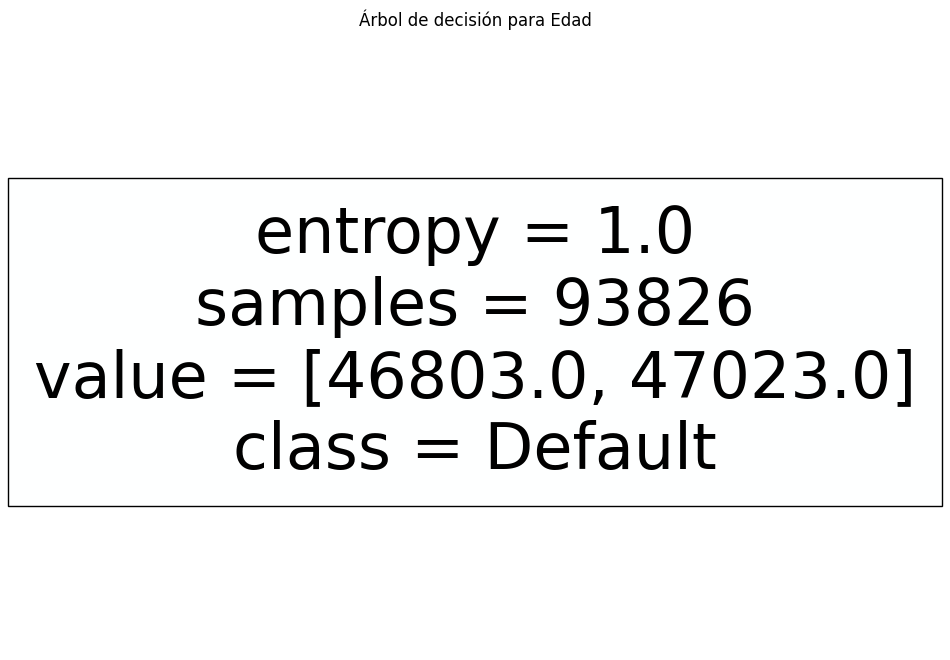

|--- class: 1

Árbol de decisión para la variable: D1_MaxD12m


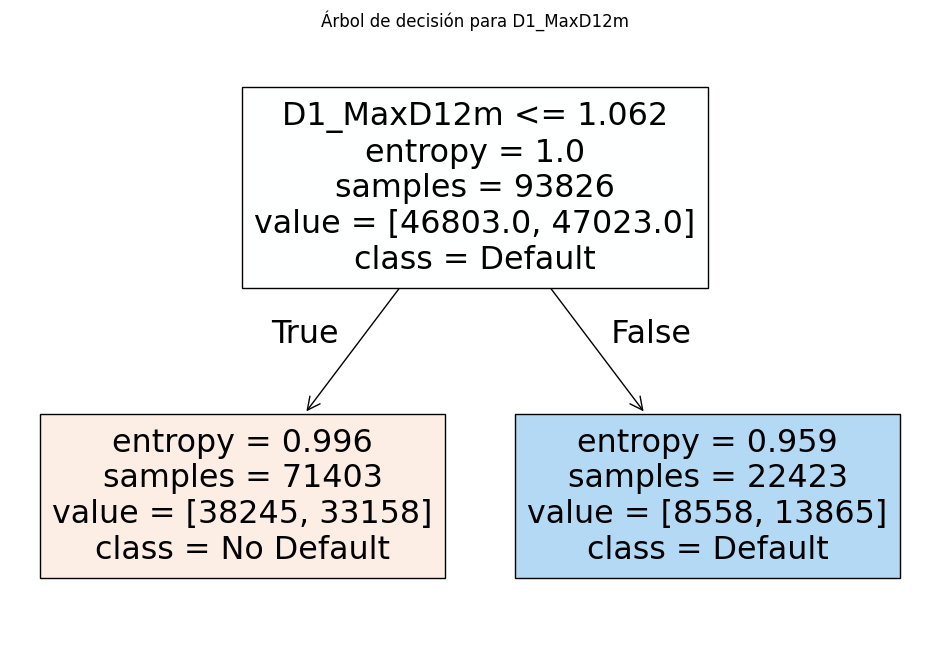

|--- D1_MaxD12m <= 1.06
|   |--- class: 0
|--- D1_MaxD12m >  1.06
|   |--- class: 1

Árbol de decisión para la variable: AntiguedadSF_u24m


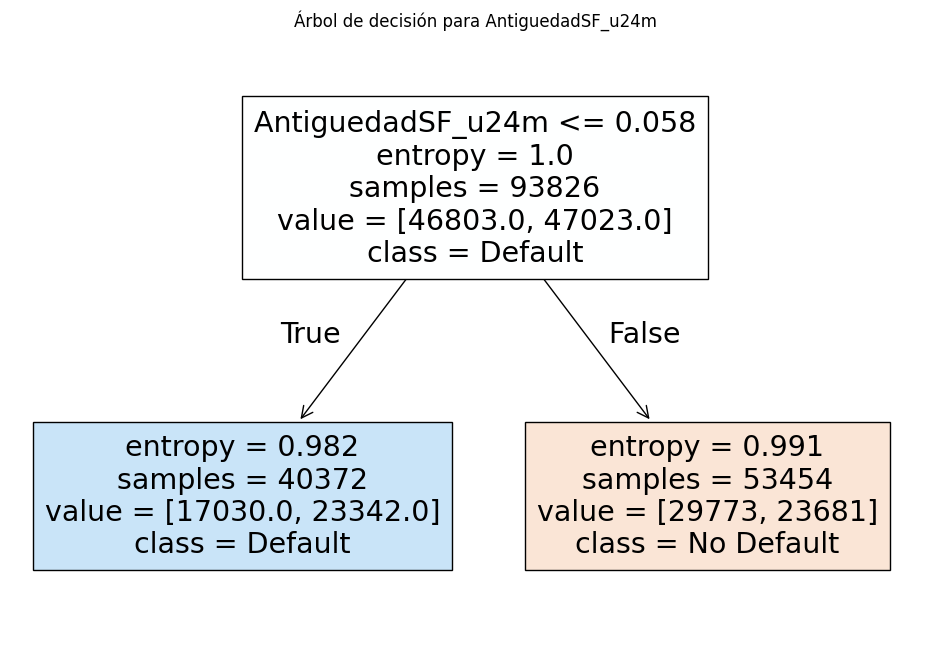

|--- AntiguedadSF_u24m <= 0.06
|   |--- class: 1
|--- AntiguedadSF_u24m >  0.06
|   |--- class: 0

Árbol de decisión para la variable: DiasAtrasos_12m


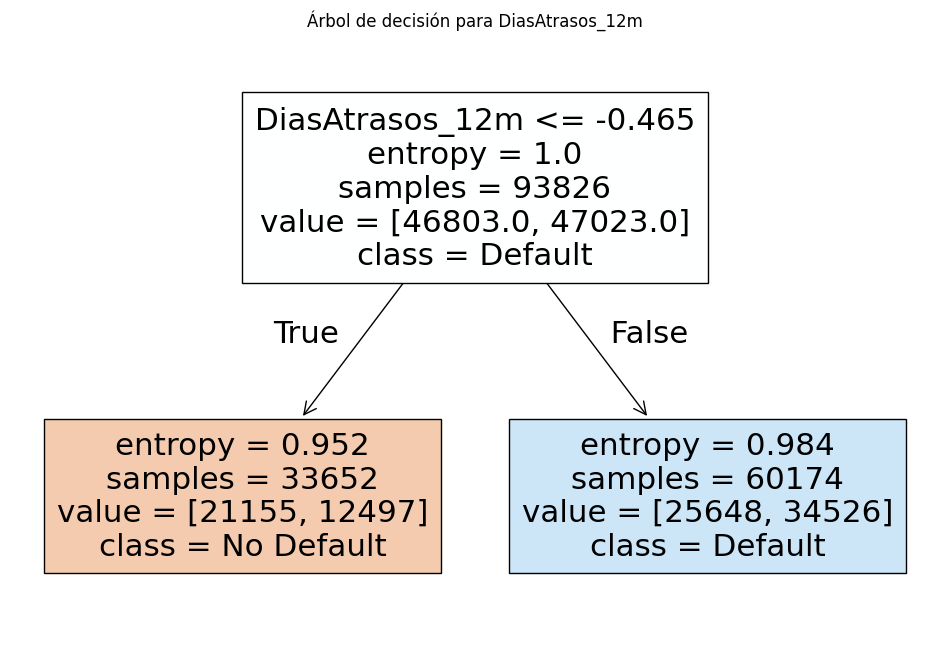

|--- DiasAtrasos_12m <= -0.47
|   |--- class: 0
|--- DiasAtrasos_12m >  -0.47
|   |--- class: 1



In [30]:
# ============================================================
# Preparación de datos
# ============================================================
# Importar la función resample
from sklearn.utils import resample # Import the resample function
# Importar StandardScaler
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Balanceo de clases (sobremuestreo de la clase minoritaria)
class_0 = dt_train[dt_train['Default'] == 0]
class_1 = dt_train[dt_train['Default'] == 1]

if len(class_0) > len(class_1):
    class_1 = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)
else:
    class_0 = resample(class_0, replace=True, n_samples=len(class_1), random_state=42)

dt_train_balanced = pd.concat([class_0, class_1])

# Dividir X e y
X = dt_train_balanced[['Edad', 'D1_MaxD12m', 'AntiguedadSF_u24m', 'DiasAtrasos_12m']]
y = dt_train_balanced['Default']

# Escalar las variables independientes
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ============================================================
# Parámetros del árbol
# ============================================================
min_samples_split = 0.05 * len(X_train)  # Min bucket
min_impurity_decrease = 0.01            # Menos restrictivo que antes

# ============================================================
# Función para entrenar y visualizar árboles de decisión
# ============================================================
def decision_tree_analysis(X, y, feature_index, feature_name):
    # Extraer la columna correspondiente
    X_feature = X[:, feature_index].reshape(-1, 1)

    # Crear y entrenar el modelo
    tree = DecisionTreeClassifier(
        criterion='entropy',
        min_samples_split=int(min_samples_split),
        min_impurity_decrease=min_impurity_decrease,
        random_state=42
    )
    tree.fit(X_feature, y)

    # Visualización del árbol
    plt.figure(figsize=(12, 8))
    plot_tree(tree, feature_names=[feature_name], class_names=["No Default", "Default"], filled=True)
    plt.title(f"Árbol de decisión para {feature_name}")
    plt.show()

    # Exportar árbol en texto
    tree_rules = export_text(tree, feature_names=[feature_name])
    print(tree_rules)

# ============================================================
# Análisis por variable
# ============================================================
features = ['Edad', 'D1_MaxD12m', 'AntiguedadSF_u24m', 'DiasAtrasos_12m']
for i, feature_name in enumerate(features):
    print(f"Árbol de decisión para la variable: {feature_name}")
    decision_tree_analysis(X_train, y_train, i, feature_name)

In [31]:
# ============================================================
# Categorización de variables
# ============================================================

# Crear una copia para evitar modificar el DataFrame original
dt_base_seg1 = dt_base_seg1.copy()

# Edad
dt_base_seg1['Edad_cat'] = np.nan
dt_base_seg1.loc[dt_base_seg1['Edad'] > 45, 'Edad_cat'] = 1
dt_base_seg1.loc[(dt_base_seg1['Edad'] > 32) & (dt_base_seg1['Edad'] <= 45), 'Edad_cat'] = 2
dt_base_seg1.loc[(dt_base_seg1['Edad'] <= 32) | (dt_base_seg1['Edad'].isna()), 'Edad_cat'] = 3

edad_summary = dt_base_seg1.groupby('Edad_cat').agg(
    N=('Edad_cat', 'size'),
    BR=('Default', lambda x: np.mean(x.dropna()))
).reset_index().sort_values('Edad_cat')
print(edad_summary)

# D1_MaxD12m
dt_base_seg1['D1_MaxD12m_cat'] = np.nan
dt_base_seg1.loc[dt_base_seg1['D1_MaxD12m'] <= 0.316, 'D1_MaxD12m_cat'] = 1
dt_base_seg1.loc[(dt_base_seg1['D1_MaxD12m'] > 0.316) & (dt_base_seg1['D1_MaxD12m'] <= 0.903), 'D1_MaxD12m_cat'] = 2
dt_base_seg1.loc[dt_base_seg1['D1_MaxD12m'] > 0.903, 'D1_MaxD12m_cat'] = 3

d1_maxd12m_summary = dt_base_seg1.groupby('D1_MaxD12m_cat').agg(
    N=('D1_MaxD12m_cat', 'size'),
    BR=('Default', lambda x: np.mean(x.dropna()))
).reset_index().sort_values('D1_MaxD12m_cat')
print(d1_maxd12m_summary)

# AntiguedadSF_u24m
dt_base_seg1['AntiguedadSF_u24m_cat'] = np.nan
dt_base_seg1.loc[dt_base_seg1['AntiguedadSF_u24m'] > 20, 'AntiguedadSF_u24m_cat'] = 1
dt_base_seg1.loc[(dt_base_seg1['AntiguedadSF_u24m'] > 15) & (dt_base_seg1['AntiguedadSF_u24m'] <= 20), 'AntiguedadSF_u24m_cat'] = 2
dt_base_seg1.loc[dt_base_seg1['AntiguedadSF_u24m'] <= 15, 'AntiguedadSF_u24m_cat'] = 3

antiguedad_summary = dt_base_seg1.groupby('AntiguedadSF_u24m_cat').agg(
    N=('AntiguedadSF_u24m_cat', 'size'),
    BR=('Default', lambda x: np.mean(x.dropna()))
).reset_index().sort_values('AntiguedadSF_u24m_cat')
print(antiguedad_summary)

# DiasAtrasos_12m
dt_base_seg1['DiasAtrasos_12m_cat'] = np.nan
dt_base_seg1.loc[dt_base_seg1['DiasAtrasos_12m'] <= 1, 'DiasAtrasos_12m_cat'] = 1
dt_base_seg1.loc[dt_base_seg1['DiasAtrasos_12m'] > 1, 'DiasAtrasos_12m_cat'] = 2

dias_atrasos_summary = dt_base_seg1.groupby('DiasAtrasos_12m_cat').agg(
    N=('DiasAtrasos_12m_cat', 'size'),
    BR=('Default', lambda x: np.mean(x.dropna()))
).reset_index().sort_values('DiasAtrasos_12m_cat')
print(dias_atrasos_summary)

# flg_SituacionLaboral
dt_base_seg1['flg_SituacionLaboral_cat'] = dt_base_seg1['flg_SituacionLaboral']
dt_base_seg1.loc[dt_base_seg1['flg_SituacionLaboral'].isna(), 'flg_SituacionLaboral_cat'] = 0

situacion_summary = dt_base_seg1.groupby('flg_SituacionLaboral_cat').agg(
    N=('flg_SituacionLaboral_cat', 'size'),
    BR=('Default', lambda x: np.mean(x.dropna()))
).reset_index()
print(situacion_summary)

# flg_Garantias
dt_base_seg1['flg_Garantias_cat'] = dt_base_seg1['flg_Garantias']

   Edad_cat      N        BR
0       1.0  18730  0.030806
1       2.0  69086  0.041542
2       3.0  12184  0.061392
   D1_MaxD12m_cat      N        BR
0             1.0  41508  0.031102
1             2.0  39975  0.041451
2             3.0  18517  0.067344
   AntiguedadSF_u24m_cat      N        BR
0                    1.0  62976  0.033600
1                    2.0  28129  0.051406
2                    3.0   8895  0.071164
   DiasAtrasos_12m_cat      N        BR
0                  1.0  44545  0.025682
1                  2.0  55455  0.055018
   flg_SituacionLaboral_cat      N        BR
0                       0.0  35161  0.065783
1                       1.0  64839  0.029026


In [35]:
# ============================================================
# División en conjuntos de entrenamiento y prueba
# ============================================================

dt_train = dt_base_seg1.iloc[v_ids]
dt_test = dt_base_seg1.drop(v_ids)

In [43]:
# ========================================
# Paquete: scorecardpy
# ========================================

# Variables candidatas y objetivo
v_var_cand = ['Edad_cat', 'D1_MaxD12m_cat', 'AntiguedadSF_u24m_cat',
              'DiasAtrasos_12m_cat', 'flg_Garantias_cat', 'flg_SituacionLaboral_cat']
v_target = 'Default'

# ========================================
# Cálculo del WoE e IV
# ========================================
# IV en el conjunto de entrenamiento
iv_train = sc.iv(dt_train, y=v_target, x=v_var_cand)
print("IV en el conjunto de entrenamiento:")
print(iv_train)

# IV en el conjunto de prueba
iv_test = sc.iv(dt_test, y=v_target, x=v_var_cand)
print("\nIV en el conjunto de prueba:")
print(iv_test)

IV en el conjunto de entrenamiento:
                   variable  info_value
5  flg_SituacionLaboral_cat    0.185413
3       DiasAtrasos_12m_cat    0.155085
1            D1_MaxD12m_cat    0.089210
2     AntiguedadSF_u24m_cat    0.083701
0                  Edad_cat    0.046252
4         flg_Garantias_cat    0.032893

IV en el conjunto de prueba:
                   variable  info_value
5  flg_SituacionLaboral_cat    0.162737
3       DiasAtrasos_12m_cat    0.115378
1            D1_MaxD12m_cat    0.105074
2     AntiguedadSF_u24m_cat    0.072998
4         flg_Garantias_cat    0.035250
0                  Edad_cat    0.028092


In [44]:
# ========================================
# Técnicas de binning
# ========================================
# Tree-based binning
sc_bins_tree = sc.woebin(dt_train, y=v_target, x=v_var_cand, bin_num_limit=5, method='tree')
print("\nTree-based binning:")
print(sc_bins_tree)

# Chi-merge binning
sc_bins_chimerge = sc.woebin(dt_train, y=v_target, x=v_var_cand, bin_num_limit=5, method='chimerge')
print("\nChi-merge binning:")
print(sc_bins_chimerge)

# Equal frequency binning
sc_bins_freq = sc.woebin(dt_train, y=v_target, x=v_var_cand, bin_num_limit=5, method='freq')
print("\nEqual frequency binning:")
print(sc_bins_freq)

# Equal width binning
sc_bins_width = sc.woebin(dt_train, y=v_target, x=v_var_cand, bin_num_limit=5, method='width')
print("\nEqual width binning:")
print(sc_bins_width)

[INFO] creating woe binning ...


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fals


Tree-based binning:
{'Edad_cat':    variable         bin  count  count_distr   good   bad   badprob       woe  \
0  Edad_cat  [-inf,2.0)  13049     0.186414  12656   393  0.030117 -0.359360   
1  Edad_cat   [2.0,3.0)  48370     0.691000  46324  2046  0.042299 -0.007056   
2  Edad_cat   [3.0,inf)   8581     0.122586   8039   542  0.063163  0.415923   

     bin_iv  total_iv breaks  is_special_values  
0  0.020486  0.046252    2.0              False  
1  0.000034  0.046252    3.0              False  
2  0.025732  0.046252    inf              False  , 'D1_MaxD12m_cat':          variable         bin  count  count_distr   good   bad   badprob  \
0  D1_MaxD12m_cat  [-inf,2.0)  29089     0.415557  28173   916  0.031490   
1  D1_MaxD12m_cat   [2.0,3.0)  27904     0.398629  26712  1192  0.042718   
2  D1_MaxD12m_cat   [3.0,inf)  13007     0.185814  12134   873  0.067118   

        woe    bin_iv  total_iv breaks  is_special_values  
0 -0.313386  0.035442   0.08921    2.0              False  
1

/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fals


Chi-merge binning:
{'Edad_cat':    variable         bin  count  count_distr   good   bad   badprob       woe  \
0  Edad_cat  [-inf,2.0)  13049     0.186414  12656   393  0.030117 -0.359360   
1  Edad_cat   [2.0,3.0)  48370     0.691000  46324  2046  0.042299 -0.007056   
2  Edad_cat   [3.0,inf)   8581     0.122586   8039   542  0.063163  0.415923   

     bin_iv  total_iv breaks  is_special_values  
0  0.020486  0.046252    2.0              False  
1  0.000034  0.046252    3.0              False  
2  0.025732  0.046252    inf              False  , 'D1_MaxD12m_cat':          variable         bin  count  count_distr   good   bad   badprob  \
0  D1_MaxD12m_cat  [-inf,2.0)  29089     0.415557  28173   916  0.031490   
1  D1_MaxD12m_cat   [2.0,3.0)  27904     0.398629  26712  1192  0.042718   
2  D1_MaxD12m_cat   [3.0,inf)  13007     0.185814  12134   873  0.067118   

        woe    bin_iv  total_iv breaks  is_special_values  
0 -0.313386  0.035442   0.08921    2.0              False  
1 

/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:949: UserWarning: Incorrect inputs; method should be tree or chimerge. Parameter was set to default (tree).
  warnings.warn("Incorrect inputs


Equal frequency binning:
{'Edad_cat':    variable         bin  count  count_distr   good   bad   badprob       woe  \
0  Edad_cat  [-inf,2.0)  13049     0.186414  12656   393  0.030117 -0.359360   
1  Edad_cat   [2.0,3.0)  48370     0.691000  46324  2046  0.042299 -0.007056   
2  Edad_cat   [3.0,inf)   8581     0.122586   8039   542  0.063163  0.415923   

     bin_iv  total_iv breaks  is_special_values  
0  0.020486  0.046252    2.0              False  
1  0.000034  0.046252    3.0              False  
2  0.025732  0.046252    inf              False  , 'D1_MaxD12m_cat':          variable         bin  count  count_distr   good   bad   badprob  \
0  D1_MaxD12m_cat  [-inf,2.0)  29089     0.415557  28173   916  0.031490   
1  D1_MaxD12m_cat   [2.0,3.0)  27904     0.398629  26712  1192  0.042718   
2  D1_MaxD12m_cat   [3.0,inf)  13007     0.185814  12134   873  0.067118   

        woe    bin_iv  total_iv breaks  is_special_values  
0 -0.313386  0.035442   0.08921    2.0              Fals

/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:949: UserWarning: Incorrect inputs; method should be tree or chimerge. Parameter was set to default (tree).
  warnings.warn("Incorrect inputs


Equal width binning:
{'Edad_cat':    variable         bin  count  count_distr   good   bad   badprob       woe  \
0  Edad_cat  [-inf,2.0)  13049     0.186414  12656   393  0.030117 -0.359360   
1  Edad_cat   [2.0,3.0)  48370     0.691000  46324  2046  0.042299 -0.007056   
2  Edad_cat   [3.0,inf)   8581     0.122586   8039   542  0.063163  0.415923   

     bin_iv  total_iv breaks  is_special_values  
0  0.020486  0.046252    2.0              False  
1  0.000034  0.046252    3.0              False  
2  0.025732  0.046252    inf              False  , 'D1_MaxD12m_cat':          variable         bin  count  count_distr   good   bad   badprob  \
0  D1_MaxD12m_cat  [-inf,2.0)  29089     0.415557  28173   916  0.031490   
1  D1_MaxD12m_cat   [2.0,3.0)  27904     0.398629  26712  1192  0.042718   
2  D1_MaxD12m_cat   [3.0,inf)  13007     0.185814  12134   873  0.067118   

        woe    bin_iv  total_iv breaks  is_special_values  
0 -0.313386  0.035442   0.08921    2.0              False  


{'Edad_cat': <Figure size 640x480 with 2 Axes>}

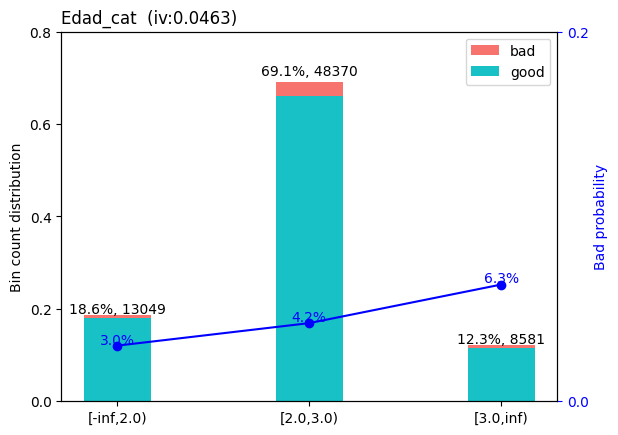

In [45]:
# ========================================
# Gráficos para revisar el binning
# ========================================
# Ejemplo: Visualizar un bin específico
# Cambia 'Edad_cat' por la variable que desees analizar
sc.woebin_plot(sc_bins_tree['Edad_cat'])

[INFO] creating woe binning ...


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:220: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the pr

{'Edad':   variable                    bin  count  count_distr   good   bad   badprob  \
0     Edad  [-inf,33.0)%,%missing   8581     0.122586   8039   542  0.063163   
1     Edad            [33.0,46.0)  48370     0.691000  46324  2046  0.042299   
2     Edad             [46.0,inf)  13049     0.186414  12656   393  0.030117   

        woe    bin_iv  total_iv          breaks  is_special_values  
0  0.415923  0.025732  0.046252  33.0%,%missing              False  
1 -0.007056  0.000034  0.046252            46.0              False  
2 -0.359360  0.020486  0.046252             inf              False  , 'D1_MaxD12m':      variable          bin  count  count_distr   good   bad   badprob  \
0  D1_MaxD12m  [-inf,0.16)  20824     0.297486  20147   677  0.032511   
1  D1_MaxD12m   [0.16,0.3)   7502     0.107171   7292   210  0.027993   
2  D1_MaxD12m    [0.3,0.9)  28473     0.406757  27262  1211  0.042532   
3  D1_MaxD12m    [0.9,inf)  13201     0.188586  12318   883  0.066889   

        woe  

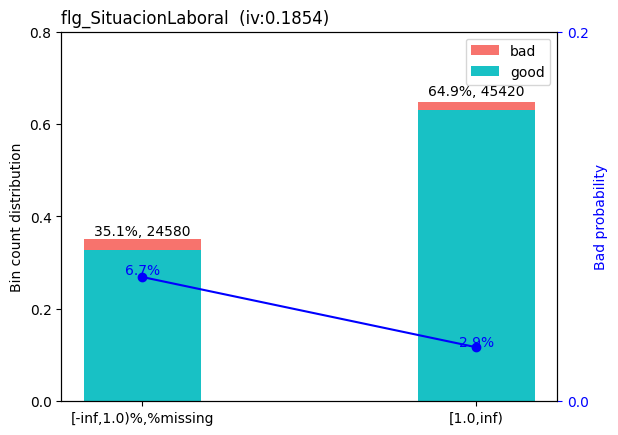

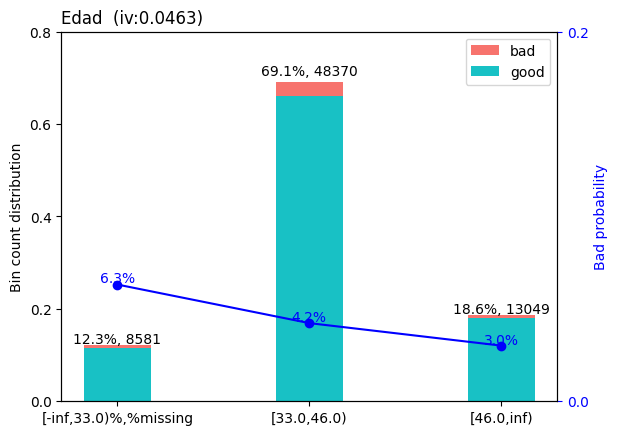

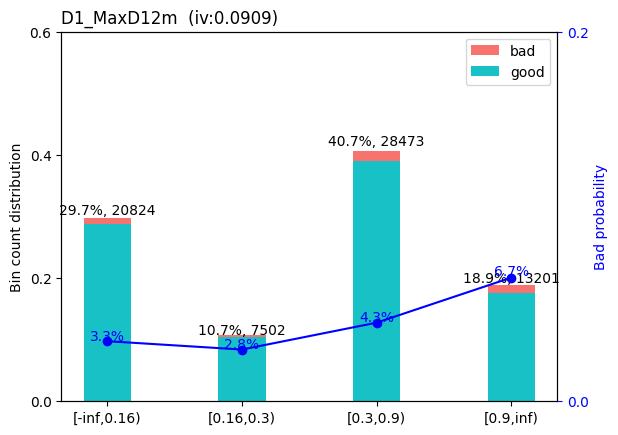

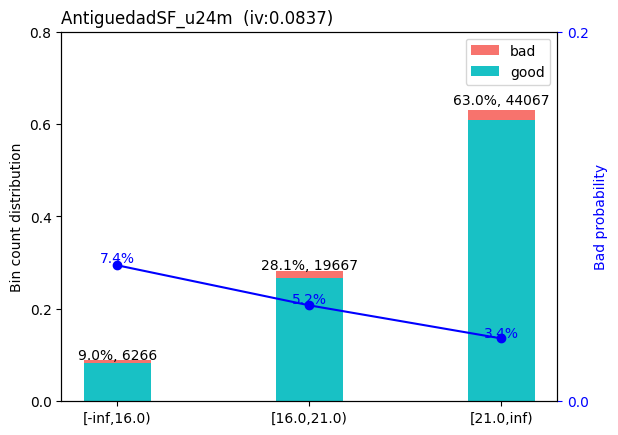

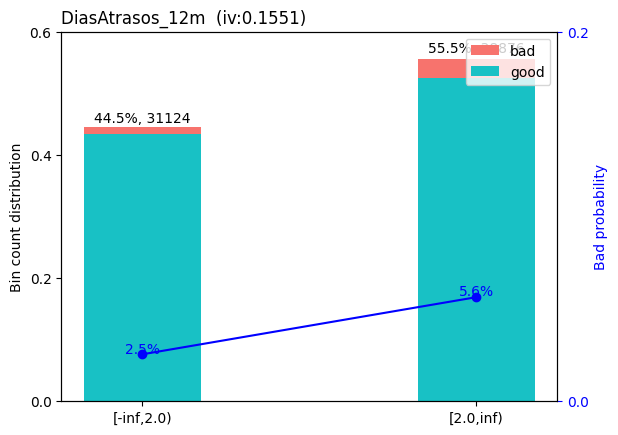

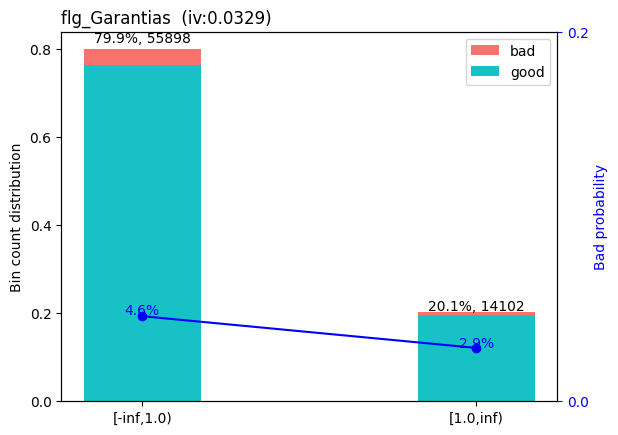

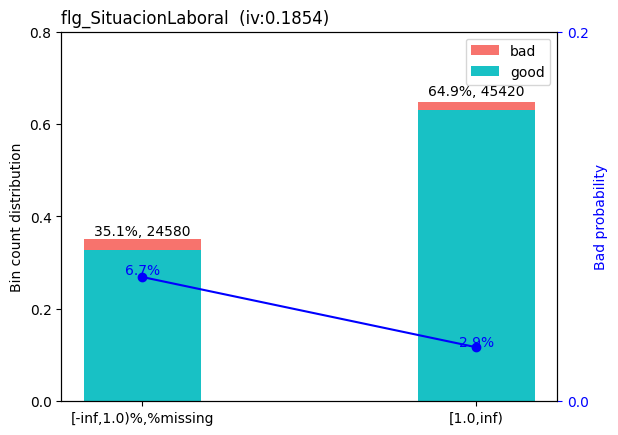

In [48]:
# Ajustes manuales de las categorías que no guardan relación o temas asociados a missing
break_list = {
    'Edad': ["33%,%missing", "46"],
    'AntiguedadSF_u24m': ["16", "21"],
    'DiasAtrasos_12m': ["2"],
    'flg_SituacionLaboral': ["missing%,%1"]
}

# Aplicar el binning con las categorías ajustadas manualmente
sc_bins_tree2 = sc.woebin(
    dt=dt_train,
    y='Default',  # Target variable
    x=['Edad', 'D1_MaxD12m', 'AntiguedadSF_u24m', 'DiasAtrasos_12m', 'flg_Garantias', 'flg_SituacionLaboral'],  # Variables categorizadas
    bin_num_limit=5,
    breaks_list=break_list,
    positive="bad|1",
    method="tree"
)

# Ver el resultado de los bins ajustados
print(sc_bins_tree2)

# Gráficos de Scorecard asociados al binning
l_plot_wow = sc.woebin_plot(sc_bins_tree2, show_iv=True)
# Mostrar gráficos individuales por variable
l_plot_wow['Edad']
l_plot_wow['D1_MaxD12m']
l_plot_wow['AntiguedadSF_u24m']
l_plot_wow['DiasAtrasos_12m']
l_plot_wow['flg_Garantias']
l_plot_wow['flg_SituacionLaboral']


                          Edad  D1_MaxD12m  AntiguedadSF_u24m  \
Edad                  1.000000    0.000277           0.001442   
D1_MaxD12m            0.000277    1.000000           0.006052   
AntiguedadSF_u24m     0.001442    0.006052           1.000000   
DiasAtrasos_12m      -0.001270    0.005666           0.000959   
flg_Garantias         0.005253   -0.001074           0.000978   
flg_SituacionLaboral  0.007404    0.007114          -0.003880   

                      DiasAtrasos_12m  flg_Garantias  flg_SituacionLaboral  
Edad                        -0.001270       0.005253              0.007404  
D1_MaxD12m                   0.005666      -0.001074              0.007114  
AntiguedadSF_u24m            0.000959       0.000978             -0.003880  
DiasAtrasos_12m              1.000000      -0.000040              0.005986  
flg_Garantias               -0.000040       1.000000              0.006243  
flg_SituacionLaboral         0.005986       0.006243              1.000000  


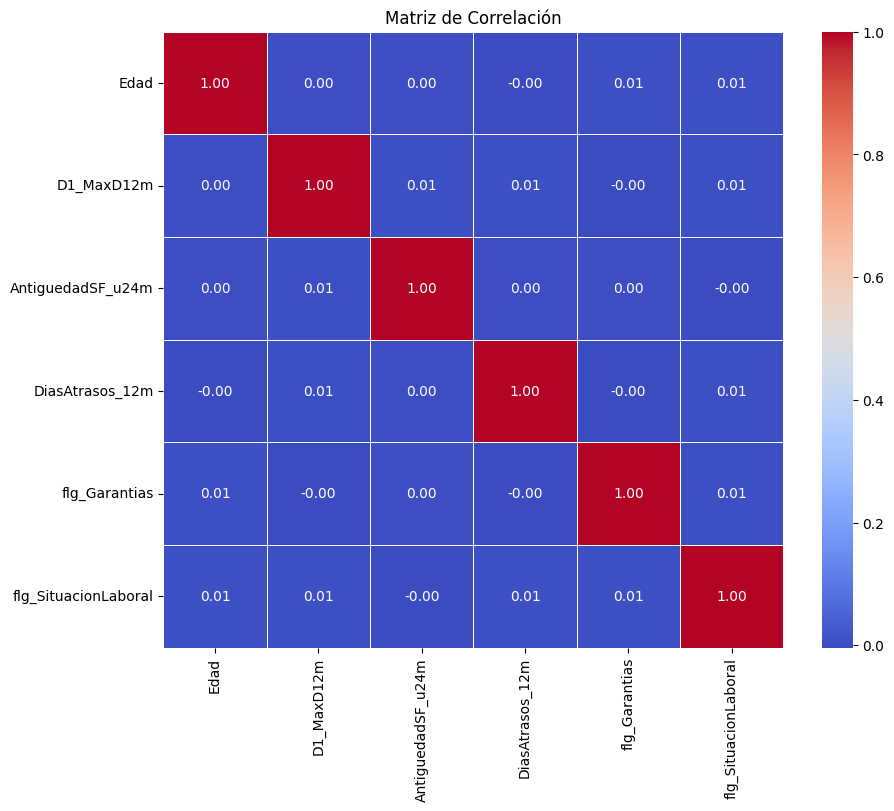

In [49]:
# Análisis de multicolinealidad
# Calcular la matriz de correlación de las variables seleccionadas
MatCorr = dt_train[['Edad', 'D1_MaxD12m', 'AntiguedadSF_u24m', 'DiasAtrasos_12m', 'flg_Garantias', 'flg_SituacionLaboral']].corr()

# Mostrar la matriz de correlación
print(MatCorr)

# Mostrar gráfico de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(MatCorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

<ipython-input-51-054f7b449adb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_train[col] = dt_train[col].astype('category')


Optimization terminated successfully.
         Current function value: 0.164023
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                70000
Model:                          Logit   Df Residuals:                    69993
Method:                           MLE   Df Model:                            6
Date:                Wed, 15 Jan 2025   Pseudo R-squ.:                 0.06846
Time:                        19:55:22   Log-Likelihood:                -11482.
converged:                       True   LL-Null:                       -12325.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.0751      0.125    -48.791      0.000      -6.319

<ipython-input-51-054f7b449adb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_train['PD'] = model_f.predict(sm.add_constant(dt_train[v_var_cand]))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:530: FutureWarning: linear keyword is deprecated, use which="linear"
  warnings.warn(msg, FutureWarning)
<ipython-input-51-054f7b449adb>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_train['XB'] = model_f.predict(sm.add_constant(dt_train[v_var_cand]), linear=True)
/usr/lo

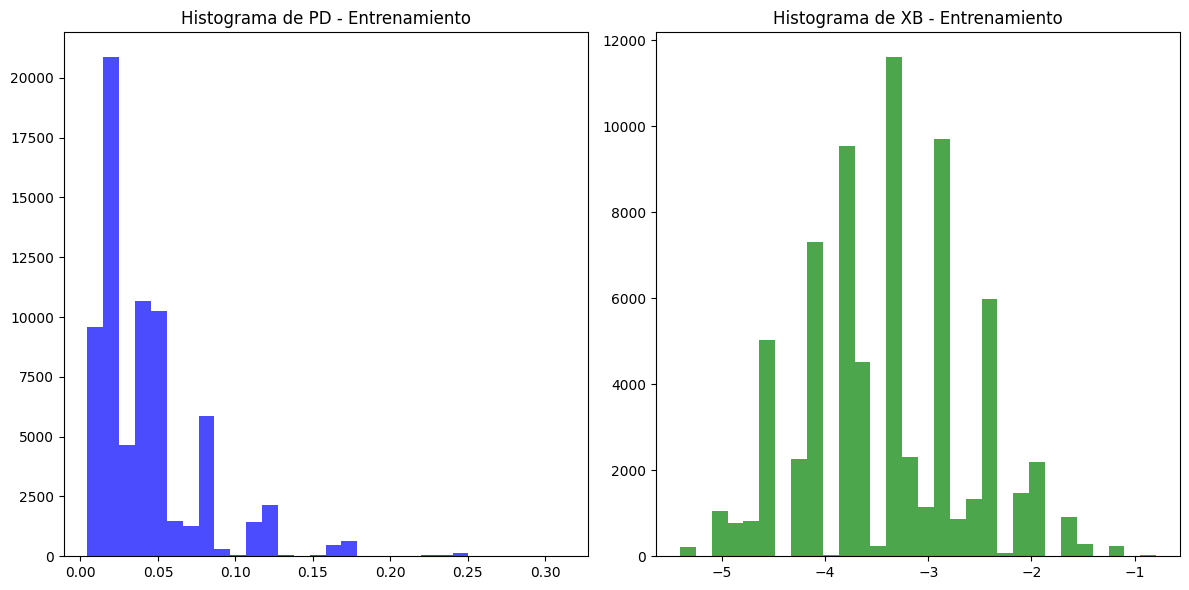

In [51]:
# ==============================================================
# Desarrollo de Scorecards:
# Estimación del Modelo (FORMA 1)
# ==============================================================
# Definir variables de interés
v_var_cand = ["Edad_cat", "D1_MaxD12m_cat", "AntiguedadSF_u24m_cat",
              "DiasAtrasos_12m_cat", "flg_Garantias_cat", "flg_SituacionLaboral_cat"]

v_target = "Default"

# Asegurarse de que las variables categóricas sean tratadas como categorías
for col in v_var_cand:
    dt_train[col] = dt_train[col].astype('category')
    dt_test[col] = dt_test[col].astype('category')

# Estimación del modelo logit (model1)
model1 = sm.Logit(dt_train[v_target], sm.add_constant(dt_train[v_var_cand])).fit()
print(model1.summary())

# Estimación del modelo con todas las variables
model_f = sm.Logit(dt_train[v_target], sm.add_constant(dt_train[v_var_cand])).fit()
print(model_f.summary())

# Estimación de la probabilidad de default (PD) para el conjunto de entrenamiento
dt_train['PD'] = model_f.predict(sm.add_constant(dt_train[v_var_cand]))

# Estimación de la probabilidad de default (PD) para el conjunto de prueba
dt_test['PD'] = model_f.predict(sm.add_constant(dt_test[v_var_cand]))

# Estimación de los valores lineales (XB)
dt_train['XB'] = model_f.predict(sm.add_constant(dt_train[v_var_cand]), linear=True)
dt_test['XB'] = model_f.predict(sm.add_constant(dt_test[v_var_cand]), linear=True)

# Histograma de las probabilidades de default (PD) y valores lineales (XB) para el conjunto de entrenamiento
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dt_train['PD'], bins=30, color='blue', alpha=0.7)
plt.title('Histograma de PD - Entrenamiento')

plt.subplot(1, 2, 2)
plt.hist(dt_train['XB'], bins=30, color='green', alpha=0.7)
plt.title('Histograma de XB - Entrenamiento')

plt.tight_layout()
plt.show()

<ipython-input-52-90e21e8d5109>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_train[col] = pd.to_numeric(dt_train[col], errors='coerce')


[INFO] converting into woe values ...
[INFO] converting into woe values ...
Optimization terminated successfully.
         Current function value: 0.163940
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                70000
Model:                          Logit   Df Residuals:                    69993
Method:                           MLE   Df Model:                            6
Date:                Wed, 15 Jan 2025   Pseudo R-squ.:                 0.06893
Time:                        19:56:54   Log-Likelihood:                -11476.
converged:                       True   LL-Null:                       -12325.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:530: FutureWarning: linear keyword is deprecated, use which="linear"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:530: FutureWarning: linear keyword is deprecated, use which="linear"
  warnings.warn(msg, FutureWarning)


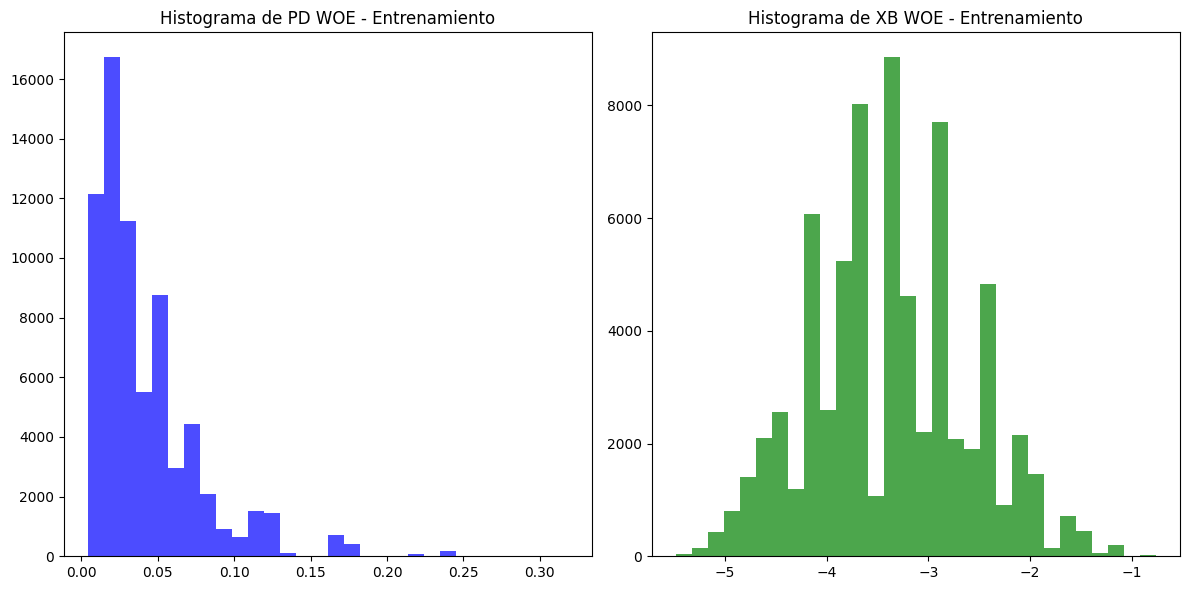

In [52]:
# ===================================================
# FORMA 2: Estimación con las variables transformadas en WoE
# ===================================================

# Crear las variables WoE para cada variable utilizando Scorecardpy
# Asumimos que sc_bins_tree2 ya está generado por la parte anterior

# Convertir las variables a tipo numérico
for col in v_var_cand:
    dt_train[col] = pd.to_numeric(dt_train[col], errors='coerce')
    dt_test[col] = pd.to_numeric(dt_test[col], errors='coerce')

# Aplicar la transformación WoE a las variables para el conjunto de entrenamiento y prueba
dt_train_woe = sc.woebin_ply(dt_train, bins=sc_bins_tree2)
dt_test_woe = sc.woebin_ply(dt_test, bins=sc_bins_tree2)

# Renombrar las variables WoE (por ejemplo, transformando "Edad_cat" en "Edad_woe")
v_var_cand_woe = [col.replace("_cat", "_woe") for col in v_var_cand]

# Estimación del modelo logit con las variables WoE
model_woe = sm.Logit(dt_train_woe[v_target], sm.add_constant(dt_train_woe[v_var_cand_woe])).fit()
print(model_woe.summary())

# Estimación de la probabilidad de default (PD) y valores lineales (XB) para el conjunto de entrenamiento
dt_train_woe['PD_WOE'] = model_woe.predict(sm.add_constant(dt_train_woe[v_var_cand_woe]))
dt_train_woe['XB_WOE'] = model_woe.predict(sm.add_constant(dt_train_woe[v_var_cand_woe]), linear=True)

# Estimación de la probabilidad de default (PD) y valores lineales (XB) para el conjunto de prueba
dt_test_woe['PD_WOE'] = model_woe.predict(sm.add_constant(dt_test_woe[v_var_cand_woe]))
dt_test_woe['XB_WOE'] = model_woe.predict(sm.add_constant(dt_test_woe[v_var_cand_woe]), linear=True)

# Mostrar los primeros registros de las variables transformadas en WoE
print(dt_train_woe.head())
print(dt_test_woe.head())

# Histograma de las probabilidades de default (PD) y valores lineales (XB) para el conjunto de entrenamiento
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dt_train_woe['PD_WOE'], bins=30, color='blue', alpha=0.7)
plt.title('Histograma de PD WOE - Entrenamiento')

plt.subplot(1, 2, 2)
plt.hist(dt_train_woe['XB_WOE'], bins=30, color='green', alpha=0.7)
plt.title('Histograma de XB WOE - Entrenamiento')

plt.tight_layout()
plt.show()

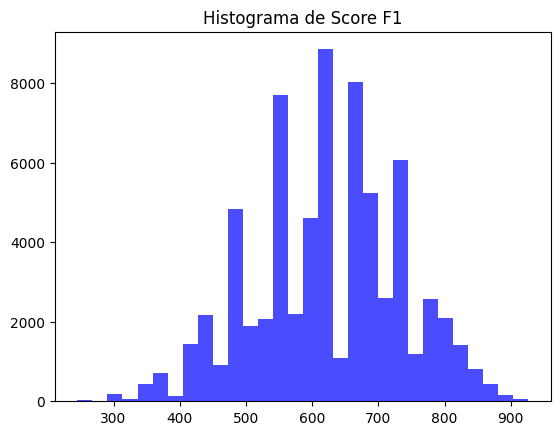

In [54]:
# ===================================================
# Escalamiento de PD
# ===================================================

# Convertir de Odds a Score
point0 = 700
odds = 50
pdo = 100

# Calcular los parámetros
factor = pdo / np.log(2)
offset = point0 - factor * np.log(odds)

# Calcular el Score F1
dt_train_woe['Score_F1'] = offset - factor * dt_train_woe['XB_WOE']

# Visualizar el histograma de Score F1
plt.hist(dt_train_woe['Score_F1'], bins=30, color='blue', alpha=0.7)
plt.title('Histograma de Score F1')
plt.show()

AUC Train: 0.7081807534800185
AUC Test: 0.7005821576500841
Gini Train: 0.41636150696003704
Gini Test: 0.4011643153001683


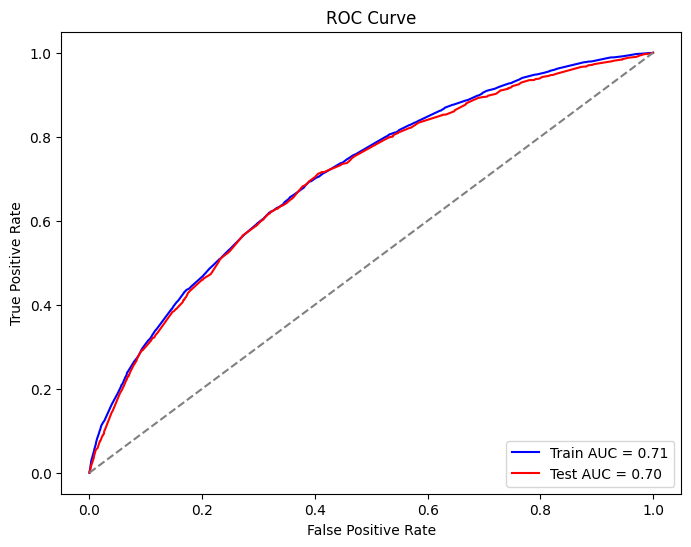

In [60]:
# ==============================================================
# Desarrollo de Scorecards:
# Métricas de performance
# ==============================================================
# Calcular AUC para los datos de entrenamiento y prueba
fpr_train, tpr_train, _ = roc_curve(dt_train_woe['Default'], dt_train_woe['PD_WOE'])
fpr_test, tpr_test, _ = roc_curve(dt_test_woe['Default'], dt_test_woe['PD_WOE'])

AUC_train = auc(fpr_train, tpr_train)
AUC_test = auc(fpr_test, tpr_test)

# Calcular el GINI
GINI_train = 2 * AUC_train - 1
GINI_test = 2 * AUC_test - 1

print(f"AUC Train: {AUC_train}")
print(f"AUC Test: {AUC_test}")
print(f"Gini Train: {GINI_train}")
print(f"Gini Test: {GINI_test}")

# Plot ROC curve para el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train AUC = {AUC_train:.2f}')
plt.plot(fpr_test, tpr_test, color='red', label=f'Test AUC = {AUC_test:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [78]:
# ***********************************
# Scorecard Metrics using scorecardpy
# ***********************************

# Definir las variables predictoras
v_var_cand = ["Edad_cat", "D1_MaxD12m_cat", "AntiguedadSF_u24m_cat",
              "DiasAtrasos_12m_cat", "flg_Garantias_cat", "flg_SituacionLaboral_cat"]

# Realizar el binning (transformación WoE) para las variables seleccionadas
sc_bins_tree2 = sc.woebin(dt_train, y="Default", x=v_var_cand, min_perc=0.05)

# Aplicar la transformación WoE a las variables en el conjunto de entrenamiento
dt_train_woe = sc.woebin_ply(dt_train, bins=sc_bins_tree2)

# Verificar que las columnas WoE se hayan generado correctamente
v_var_cand_woe = [col for col in dt_train_woe.columns if col.endswith('_woe')]
print(f"Variables WoE generadas: {v_var_cand_woe}")

# Ajustar el modelo de regresión logística usando las variables transformadas por WoE
model_woe = sm.Logit(dt_train_woe['Default'], sm.add_constant(dt_train_woe[v_var_cand_woe])).fit()

# Imprimir los parámetros del modelo para asegurarse de que están bien formados
print(model_woe.params)

# Parámetros del scorecard
point0 = 700
odds = 50
pdo = 100

[INFO] creating woe binning ...


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fals

[INFO] converting into woe values ...
Variables WoE generadas: ['AntiguedadSF_u24m_cat_woe', 'flg_Garantias_cat_woe', 'DiasAtrasos_12m_cat_woe', 'D1_MaxD12m_cat_woe', 'flg_SituacionLaboral_cat_woe', 'Edad_cat_woe']
Optimization terminated successfully.
         Current function value: 0.163985
         Iterations 8
const                          -3.113384
AntiguedadSF_u24m_cat_woe       1.041627
flg_Garantias_cat_woe           1.005923
DiasAtrasos_12m_cat_woe         1.019112
D1_MaxD12m_cat_woe              1.032949
flg_SituacionLaboral_cat_woe    1.013350
Edad_cat_woe                    0.915347
dtype: float64
